# Modelflow methods reference 

The main text of this document presents a large range of `ModelFlow` features in the context of where they may be used.  This chapter reproduces much of that information but out of context.  It is not a full technical reference to `ModelFlow`  but it does attempt to put into place a handy reference to many of the commands that a `ModelFlow` user of the World Bank models would need. Ib Hansen maintains a `ModelFlow` reference [here](https://ibhansen.github.io/doc/). 


:::{admonition} In this chapter - ModelFlow Methods Reference
:class: tip

This chapter provides a summary reference of the main methods of `ModelFlow` package. It is not comprehensive, but is meant to be used as a handy guide to the syntax of the many methods in `ModelFlow`.  More detailed explanations of many of the methods occur in the text and can be found by consulting the index.

Features included in the reference include:

- **Jupyter Notebook Integration**:
  - Utilize Jupyter-specific commands and features for an interactive modeling experience.
  - Enable extensions to enhance productivity (e.g., auto-completion, variable inspection).

- **Core Model Methods**:
  - Manage model properties and equations with methods for adding, modifying, or deleting equations.
  - Use `.dekomp()` for decomposition and `.tracepre()` for dependency analysis.
  - Perform simulations and save results with explicit methods like `.solve()` and `.pcim`.

- **DataFrame Manipulations**:
  - Leverage ModelFlow extensions to `pandas` for time-series analysis and variable transformations.
  - Use `.upd()` and `.mfcalc()` for data updates and calculated transformations.

- **Visualization and Reporting**:
  - Create charts and plots with `.plot()` and `.draw()` for clear data representation.
  - Build structured reports using `.rtable()` and `.rplot()` methods.

- **Advanced Features**:
  - Define time frames and scenarios for focused simulations.
  - Save and compare results across multiple runs for robust analysis.



:::


In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb   ')


In [3]:
# Prepare the notebook for use of ModelFlow 

# Jupyter magic command to improve the display of charts in the Notebook
%matplotlib inline

# Import pandas 
import pandas as pd

# Import the model class from the modelclass module 
from modelclass import model 

# functions that improve rendering of ModelFlow outputs
model.widescreen()
model.scroll_off();

<IPython.core.display.Javascript object>

In order to manipulate plots later on matplotlib.pyplot is also imported. 

In [4]:
import matplotlib.pyplot as plt # To manipulate plots 

## Useful Jupyter Notebook commands and features

### .widescreen() 

Instructs `ModelFlow`to take full advantage of the space available on the browser under which `Jupyter Notebook` is running. 

In [5]:
model.widescreen() 

### .scroll_off()

Instructs ModelFlow not to scroll outputs within a cell, but to show the whole output. Useful when displaying multiple charts and tables. 

In [6]:
model.scroll_off()

<IPython.core.display.Javascript object>

In [7]:
latex=True #used to ensure  that outputs render well in pdf format

## Working with the Model Object

The model object is the central object in `ModelFLow`.  It's methods are used to read and write models from disk, and to perform simulations, and to report the results of simulations both as graphs and tables.  Its properties include the data associated with the model, the current options that impact simulations, the individual equations that together comprise the system of equations that the model object solves.

## Selected model properties
Models once built can be saved to disk for later reloading.  The entire model state can be saved, including options for the solve operator, and the results from solutions that were earlier run with the keep option.

The model state has many properties. Including: 
:::{only} latex
\begin{tabularx}{\textwidth}{>{\raggedright\arraybackslash}p{3.5cm}>{\raggedright\arraybackslash}p{4.0cm}>{\raggedright\arraybackslash}X}
:::
|Content|Property|Description |
| :--- | :---- |  :---- | 
|Model equations|`.equation`| Returns a very long string containing all of the equations of the model.|
|Model name  |`.name` | Returns the internal name of the model. For WBG models this is typically the 3 letter ISO code for the country , i.e. PAK for Pakistan|
|Model description |`.model_description` | If defined, returns a string with a longer description of the model -- otherwise returns a blank string.|
|Base solution|`.basedf`   |Returns a `DataFrame` of all the variables in the model with the values from the baseline or initialization values of the model.|
|Last solution|`.lastdf`   |Returns a `DataFrame` of all the variables in the model with the values from the most recently executed simulation.|
|Kept solutions|`.keep_solutions`   |A dictionary of `DataFrame`s. The key to the dictionary is the text passed to the `keep=`copmmand when the solution was run, and the value is the `DataFrame` generated by the simulation.|
|Current time frame|`.current_per`   | Returns the active sample period of the model (the time-slice over which the model will be solved).|
|Simulation options|`.oldkwargs`    | Returns a dictionary, showing the current state of the persistent options of the model.|
|Variable descriptions|`.var_description`   |Returns a dictionary, with long form descriptions of those mnemonics in the model that have been assigned a long-form description. |
|User defined lists of variables |`.var_groups`    |Returns a dictionary, showing the various groups (lists of variables) that have been defined for this model object.|
|Reports|`.reports`| Returns a Dictionary of all Reports (if any) that have been defined for the  model.|

## Selected Model methods

### .model_load() method: Loading  models

The `model_load()`method instantiates (creates) a new model object from a previously saved pcim file. 


Parameters:

| Parameter | Type | Description |
|:-----------|:------|:-------------|
| `infile` | string | The name of the file or URL from which the model will be loaded. |
| `funks` | list | Functions to use in the resulting model. Default is an empty list. |
| `run` | bool | If `True`, simulates the model with the saved time and options. Default is `False`. |
| `keep_json` | bool | If `True`, saves a dictionary (`self.json_keep`) in the model instance. Default is `False`. |
| `default_url` | string | The default URL where to look for the model if it is not in the specified location. Default value is:<br> 'https://raw.githubusercontent.com/IbHansen/ModelFlow-manual/main/model_repo/',**kwargs)'| 
| `**kwargs` | dict | Additional keyword arguments used by the simulation if `run=True`. |

Returns

- **tuple**: A tuple containing a model instance and a DataFrame.

#### Load an example model and create a model instance
Also the model is run 

In [8]:
mpak,baseline = model.modelload('../models/pak.pcim', \
         run=True,keep= 'Baseline')

Zipped file read:  ..\models\pak.pcim


The above example declares an instance of a model object `mpak` and a `DataFrame` -- baseline-- that holds the results of the simulation invoked by the `run=True` option.  The `keep='Baseline'` instructs the method to also store the result of the initial simulation as a scenario identified by the text 'Baseline'.

### .model_dump() method: Saving  models
The `.modeldump()` method saves the content of a model object to disk. By default, models are stored using the [**json** format](https://en.wikipedia.org/wiki/JSON). By convention dumped `ModelFlow` objects are saved to a file with the **.pcim** extension.


 Parameters:

| Parameter | Type | Description |
|-----------|------|-------------|
| `outfile` | string | The name of the file where the model will be dumped. Default is an empty string, meaning the dump will be returned as a string. |
| `keep` | bool | If `True`, the `keep_solutions` attribute of the model will also be dumped. Default is `False`. |

 Returns

- **string**: If `outfile` is an empty string or not specified, the method returns the model dump as a JSON string.

#### example


In [9]:
mpak.modeldump('Mymodel/Mymodel',keep=True)

Saves the model object `mpak` to a file called Mymodel.pcim located in the Mymodel sub-directory.  The model would also contain the results `DataFrames` for all the simulations that were stored with the keep option.

In [10]:
!dir Mymodel\*.pcim

 Volume in drive C has no label.
 Volume Serial Number is C2DB-095E

 Directory of c:\modelflow manual\papers\mfbook\content\07_MoreFeatures\Mymodel

04-09-2025  13:49         2.084.793 Mymodel.pcim
               1 File(s)      2.084.793 bytes
               0 Dir(s)  589.437.902.848 bytes free


## Equations
        
The model object includes both the data of the model and the equations that define the relationship between the variables.

### Fixable equations


A behavioral equation determines the value of an endogenous variable, based on an econometric relationship
rather than an accounting identity. They are comprised of right-hand side variables (the regressors in the econometric
relationship or the explanatory variables), left hand side variables (the regressands or dependent variable), estimated
parameters, perhaps some imposed parameters, and the error term.

In addition to these elements, a fixable equation will have three special variables defined, which allow the equation to be de-activated (exogenized).  These variables carry the same root mnemonmic as the equation's dependent variable and the terminators, $\_A$, $\_X$, $\_D$.

|Terminator| Meaning| Role|
|:--|:--|:--|
|\_A|Add factor:| special variable to allow judgment to be added to an equation|
|\_X|Exogenized value:| Special variable that stores the value that the equation should return if exogenized|
|\_D|Exogenous dummy:|Dummy variable. When set to one, the equation will return the value of the \_𝑋 variable, if zero, it returns the fitted value of the equation plus the Add factor|

A standard econometric equation such as $ y_t = \hat{\alpha} + \hat{\beta} X_t + y\_A_t$ can be rewritten as 

\begin{equation*}
y_t = (1-y\_D_t)\cdot\underbrace{\biggl[\hat{\alpha} + \hat{\beta} X_t + y\_A_t\biggr]}_{\begin{array}{c} \text{Econometric equation}\end{array}} + y\_D_t\cdot \underbrace{y\_X_t}_{\begin{array}{c} \text{Exogenized} \\ \text{value} \end{array}}
\end{equation*}

When $y\_D_t=1$ then the first expression (the econometric equation) solves to zero and the equation just returns the value $y\_X_t$.


### .var_with_frmlname('DAMP'), Dampable variables

Returns a **set** of variable names of equations that can be Dampened (dampening adjusts the size of changes to a variable that are imposed when the model is trying to solve.

Below the set is made to a sorted **list** and the first 3 variable names are printed. 

### `.wb_behavioral` property: returns a list of fixable (behavioral) equations

`.wb_behavioral` is a property of a model object, which defines all of the behavioral (fixable) equations in the model object. 

#### example
`themodel.wb_behavioral` will return a list of all the variables with fixable equations.


### .fix() method: exogenizes one or more equations in the model.

The `fix()`method sets the $\_D$ variable to 1 and the $\_X$ variable to the value that the user wants the equation to resolve to when exogenized.

Parameters:

| Parameter | Type           | Description                                                   |
|:-----------|:----------------|:---------------------------------------------------------------|
| `df`      | TYPE           | Input dataframe should contain a solution and all variables.  |
| `pat`     | TYPE, optional | Select variables to exogenize. Defaults to '\*' (All variables).|
| `start`   | TYPE, optional | Start period. Defaults to ''.                                 |
| `end`     | TYPE, optional | End period. Defaults to ''.                                   |
| `silent`  | int, optional  | If set to 1, suppresses print output. Defaults to 0.          |


Returns:
- A DataFrame.

#### example 1


Cfixed=themodel.fix(baseline,'PAKNECONPRVTKN')

Returns a new `DataFrame` `Cfixed` exactly equal to the baseline `DataFrame` but with the `PAKNECONPRVTKN_D` variable set to 1.  This equation will now return `PAKNECONPRVTKN_X` for all periods where `PAKNECONPRVTKN_D` is equal to 1.  `PAKNECONPRVTKN_X` will be set equal to the current value of `PAKNECONPRVTKN`. To do a meaningful simulation the value of `PAKNECONPRVTKN_X` would have to be changed, say as below.


`Cfixed=Cfixed.upd("<2025 2040> PAKNECONPRVTKN_X * 1.025")` which would increase the value of consumption by 2.5% between the years 2025 and 2040.



#### example 2

Cfixed2=themodel.fix(baseline,'PAKNECONPRVTKN',start=2045,end=2050)

Returns a new `DataFrame` `Cfixed2` exactly equal to the baseline `DataFrame` but with the `PAKNECONPRVTKN_D` variable set to 1 for the years 2045 through 2050.  This equation will now return `PAKNECONPRVTKN_X` for this period.

`Cfixed=Cfixed.upd("<2025 2050> PAKNECONPRVTKN_X * 1.025")` would increase the value of consumption by 2.5% for the period 2020 through 2045.

In this example the changes to `PAKNECONPRVTKN_X` before 2045 would have no effect as the variable was only exogenized in the preceding fix statement for the period 2045 through 2050.




### .unfix() method:re-activates an exogenized equation

Parameters:
| Parameter | Type             | Description                                                   |
|-----------|------------------|---------------------------------------------------------------|
| `df`      | Dataframe        | Input dataframe, should contain a solution and all variables. |
| `pat`     | string, optional | Select variables to endogenize. Defaults to '*'.              |
| `start`   | TYPE, optional   | Start period. Defaults to ''.                                 |
| `end`     | TYPE, optional   | End period. Defaults to ''.                                   |

Returns:

A dataframe with the `_D` version of the specified variables set to zero for the specified time period.

#### example1

`Unfixed=themodel.fix(Cfixed2,'PAKNECONPRVTKN')`

Creates a new `DataqFrame` that is a copy of `Cfixed2` but with `PAKNECONPRVTKN_D` equal to zero over the entire period.

#### example2
`Unfixed2=themodel.fix(Cfixed2,'PAKNECONPRVTKN','2040','2050)`  

Creates a new `DataFrame`', `unfixed2` that is a copy of `Cfixed2` but with `PAKNECONPRVTKN_D` equal to zero over the period period 2040 through 2050.  If `PAKENCONPRVTKN` had been exogenized for a longer period, it would remain exogenized in the periods outside of 2050- 2050.


### `.fix_inf` property: Returns a list of the variables currently exogenized (fixed) 


`.wb_inf` is a property of a model object, which returns a list of the behavioral (fixable) equations in the model object that are currently fixed (exogenized).





## Visualize equations

`ModelFlow` offers three ways to visualize an equation.

|Methods|Returns|
|:--|:--|
|.eviews()| returns the original EViews form of the equation (only available for models imported from EViews)|
|.frml()| returns the internal normalized version of the EViews equation|
|.show()| returns the internal normalized version of the EViews equation and data for theLHS and RHs variables of the equation from both the `.basedf`, `.lastdf` `DataFrames` and their differences |

### .eviews() method: Diplays the original format of the equation

In [11]:
mpak.PAKBXGSRMRCHCD.eviews;

DLOG(PAKBXGSRMRCHCD) = 2.82268702067837e-08*(LOG(PAKBXGSRMRCHCD( - 1)) - 505277.224656802*LOG(PAKXMKT( - 1)) - 2.91054176583784*LOG(PAKREER( - 1))) + 0.0683002735007435 + 0.167350489665585*DLOG(PAKXMKT) + 0.0611655503957304*DLOG(PAKREER)


### .eviews() method: Displays the normalized form of the equation


In [12]:
mpak.PAKBXGSRMRCHCD.frml;

Endogeneous: PAKBXGSRMRCHCD: Exp., MRCH (BOP), US$ mn
Formular: FRML <DAMP,STOC> PAKBXGSRMRCHCD = (PAKBXGSRMRCHCD(-1)*EXP(PAKBXGSRMRCHCD_A+ (2.82268702067837E-08*(LOG(PAKBXGSRMRCHCD(-1))-505277.224656802*LOG(PAKXMKT(-1))-2.91054176583784*LOG(PAKREER(-1)))+0.0683002735007435+0.167350489665585*((LOG(PAKXMKT))-(LOG(PAKXMKT(-1))))+0.0611655503957304*((LOG(PAKREER))-(LOG(PAKREER(-1))))) )) * (1-PAKBXGSRMRCHCD_D)+ PAKBXGSRMRCHCD_X*PAKBXGSRMRCHCD_D  $

PAKBXGSRMRCHCD  : Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_A: Add factor:Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_D: Fix dummy:Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_X: Fix value:Exp., MRCH (BOP), US$ mn
PAKREER         : Real Exchange Rate (Trade Weighted)
PAKXMKT         : Weighted Trading Partner Demand




### .show() method: Displays the normalized form of the equation plus data from the `.lastdf`, `.basedf` `DataFrame`s and their difference

In [13]:
with mpak.set_smpl(2024,2032):
    mpak.PAKBXGSRMRCHCD.show; 

Endogeneous: PAKBXGSRMRCHCD: Exp., MRCH (BOP), US$ mn
Formular: FRML <DAMP,STOC> PAKBXGSRMRCHCD = (PAKBXGSRMRCHCD(-1)*EXP(PAKBXGSRMRCHCD_A+ (2.82268702067837E-08*(LOG(PAKBXGSRMRCHCD(-1))-505277.224656802*LOG(PAKXMKT(-1))-2.91054176583784*LOG(PAKREER(-1)))+0.0683002735007435+0.167350489665585*((LOG(PAKXMKT))-(LOG(PAKXMKT(-1))))+0.0611655503957304*((LOG(PAKREER))-(LOG(PAKREER(-1))))) )) * (1-PAKBXGSRMRCHCD_D)+ PAKBXGSRMRCHCD_X*PAKBXGSRMRCHCD_D  $

PAKBXGSRMRCHCD  : Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_A: Add factor:Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_D: Fix dummy:Exp., MRCH (BOP), US$ mn
PAKBXGSRMRCHCD_X: Fix value:Exp., MRCH (BOP), US$ mn
PAKREER         : Real Exchange Rate (Trade Weighted)
PAKXMKT         : Weighted Trading Partner Demand

Values :


,2024,2025,2026,2027,2028,2029,2030,2031,2032
Base,"24,610.56","25,255.34","25,947.52","26,684.34","27,463.46","28,283.03","29,141.67","30,038.42","30,972.61"
Last,"24,610.56","25,255.34","25,947.52","26,684.34","27,463.46","28,283.03","29,141.67","30,038.42","30,972.61"
Diff,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Input last run:


,2024,2025,2026,2027,2028,2029,2030,2031,2032
PAKBXGSRMRCHCD(-1),"24,016.39","24,610.56","25,255.34","25,947.52","26,684.34","27,463.46","28,283.03","29,141.67","30,038.42"
PAKBXGSRMRCHCD_A,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00
PAKBXGSRMRCHCD_D,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKBXGSRMRCHCD_X,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKREER,165.96,171.41,176.37,180.95,185.21,189.25,193.17,197.07,201.05
PAKREER(-1),159.92,165.96,171.41,176.37,180.95,185.21,189.25,193.17,197.07
PAKXMKT,13.19,13.51,13.84,14.18,14.52,14.88,15.24,15.61,15.99
PAKXMKT(-1),12.87,13.19,13.51,13.84,14.18,14.52,14.88,15.24,15.61


Input base run:


,2024,2025,2026,2027,2028,2029,2030,2031,2032
PAKBXGSRMRCHCD(-1),"24,016.39","24,610.56","25,255.34","25,947.52","26,684.34","27,463.46","28,283.03","29,141.67","30,038.42"
PAKBXGSRMRCHCD_A,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00
PAKBXGSRMRCHCD_D,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKBXGSRMRCHCD_X,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKREER,165.96,171.41,176.37,180.95,185.21,189.25,193.17,197.07,201.05
PAKREER(-1),159.92,165.96,171.41,176.37,180.95,185.21,189.25,193.17,197.07
PAKXMKT,13.19,13.51,13.84,14.18,14.52,14.88,15.24,15.61,15.99
PAKXMKT(-1),12.87,13.19,13.51,13.84,14.18,14.52,14.88,15.24,15.61


Difference for input variables


,2024,2025,2026,2027,2028,2029,2030,2031,2032
PAKBXGSRMRCHCD(-1),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKBXGSRMRCHCD_A,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKBXGSRMRCHCD_D,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKBXGSRMRCHCD_X,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKREER,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKREER(-1),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKXMKT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PAKXMKT(-1),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


:::{image} varshow.png
    :alt: Menu to start notebooks in subfolders
    :class: bg-primary mb-1
    :width: 70%
    :align: center
:::    

:::{index} single: Revising model equations
:::

:::{index} single: Equations; .equpdate() Revising model equations
:::

:::{index} single: Equations; .eqdelete() Deleting  model equations
:::


## Adding, Modifying, or Deleting Equations

Sometime it can be useful to change a model. You might need to:

- **Add new equations** to incorporate additional functionality or dynamics.
- **Modify existing equations** to refine or adjust the model's behavior.
- **Delete unnecessary equations** to simplify the model or remove obsolete components.

These actions enable you to tailor the model to better meet your specific requirements.


### `.eqdelete` Delete equations 

| Parameter | Type           | Description                                                   |
|-----------|----------------|---------------------------------------------------------------|
| `deleteeq`| TYPE, optional | Variables where equations are to be deleted. Defaults to None.|
| `newname` | string, optional| The name of the new model with deleted equations. Defaults to an empty string.|

**Returns:**

- `newmodel`: TYPE - The new model with the deleted equations.
- `newdf`: TYPE - A dataframe with calculated add factors. Origin is the original model's lastdf.


### `.equpdate ` Update or add  equations 

| Parameter      | Type           | Description                                                   |
|----------------|----------------|---------------------------------------------------------------|
| `updateeq`     | TYPE           | New equations separated by newline.                           |
| `add_add_factor`| bool, optional| Whether to add an add factor. Defaults to False.              |
| `calc_add`     | bool, optional | Whether to calculate add factors. Defaults to True.           |
| `do_preprocess`| bool, optional | Whether to preprocess the equations. Defaults to True.        |
| `newname`      | string, optional| The name of the updated model. Defaults to an empty string.   |
| `silent`       | bool, optional | Whether to suppress print outputs. Defaults to True.          |

**Returns:**

- `newmodel`: TYPE - The updated model with new and deleted equations.
- `newdf`: TYPE - A dataframe with calculated add factors. Origin is the original model's lastdf.


In [14]:
dampable_variables = sorted(mpak.var_with_frmlname('DAMP'))
print(f'Number of dampable variables: {len(dampable_variables)}')
print(f'First 3 dampable variables  : {dampable_variables[:3]}')


Number of dampable variables: 75
First 3 dampable variables  : ['PAKBMFSTOTHRCD', 'PAKBMFSTREMTCD', 'PAKBMGSRGNFSCD']


## Manipulating `DataFrames`




Pandas dataframes can be extended with new functionality. When the `import modelclass` statement is executed ModelFlow will 
extend dataframes with two new capabilities. 
 - **.upd** which allows easy updating of variables (columns) in dataframes. The purpose is to facilitate relevant update operations. 
 - **.mfcalc** which enables transformations using lags and straight expressions. 
 
 

### .loc() method

### `.upd` Updates a dataframe and returns a dataframe

Parameters:

| Parameter    | Type    | Description   | Default |
|--------------|---------|---------------|---------|
| `basis`      | string  | Lines with variable updates (see below for format). | |
| `lprint`     | bool, optional | If `True`, each update is printed. | `False` |
| `scale`      | float, optional | A multiplier used on all update input. | `1.0` |
| `create`     | bool, optional | Creates variables if not in the dataframe. | `True` |
| `keep_growth`| bool, optional | Keep the growth rate after the update time frame. | `False` |

A line in updates looks like this:

```
[<[[start] end]>] <var> <=|+|*|%|=growth|+growth|=diff> <value>... [--keep_growth_rate|--kg|--no_keep_growth_rate|--nkg]
```
The number of values should either be one - which then is applied to all years, or the number of years from start to end. 

Time carries over from line to line. 

The `basis`string can contain several updates separated by new line. 

Returns:
A new dataframe containing the updated values of the input dataframe 



### `.mfcalc` Updates a dataframe and returns a dataframe
This implement the model class on top of pandas dataframes. Useful to do transformations with lags. 


| Parameter | Type     | Description                                                                 | Default |
|-----------|----------|-----------------------------------------------------------------------------|---------|
| `eq`      | str     | Equations, one on each line. Can be started with `<start end>` to control calculation sample. |         |
| `start`   | optional | DESCRIPTION.                                                               | `''`    |
| `end`     | optional | DESCRIPTION.                                                               | `''`    |
| `showeq`  | bool, optional | If `True`, the equations will be printed.                                  | `False` |
| `**kwargs`| optional     | Here all solve options can be provided.      |

Each equation $f_i$  is specified as:


```
<left hand side> = <right hand side> $
```

Each formula ends with a \$.

The ```<left hand side>``` should not contain transformations. Lags or leads can not be specified at the left hand side of $=$. 


Time $t$ is implicit in the equations which means that a $var$ at time $t$ written as ```var```, while $var_{t-1}$ is written as ```var(-1)```. ModelFlow is case-insensitive. Everything is eventually transformed into upper case.

The ```<right hand side>``` can contain variables, operators, functions 

## Performing Simulations
(simulationEngines)=

`ModelFlow`is a package to solve complex systems of equations.  It supports a range of solution engines, each of which has different features.


:::{index} single: model instance(); Model simulation 
:::
###  `<model instance>()`  method, solve the model 

The most convenient way to solve a model is to call it by passing simulation parameters directly to the model instance[^HowImplemented]. 

[^HowImplemented]: For those familiar with programming in Python, technically this is implemented as the model class method `__call__`. 

:::{only} latex
\begin{tabularx}{\textwidth}{>{\raggedright\arraybackslash}p{3cm}>{\raggedright\arraybackslash}p{3cm}>{\raggedright\arraybackslash}X}
:::


| Parameter           | Type           |  Description   |
|---------------------|----------------|----------------|
| `do_calc_add_factor`| bool           |  Determines whether to calculate the add factors. Used to calculate add-factors to ensure the model exactly reproduces the submitted data set.  Default is True. |
| `reset_options`     | bool           |  If True, the previous options will be reset. Default is False. |
| `solver`            | str            |  Specifies the solver to be used. Default is chosen based on the model's properties. (Typically `sim` (Gauss-seidel) for WB models, or `newton-stacked` for forward-looking models.)|
| `silent`            | bool           |  If True, the solver runs silently without printing outputs to the console. Default is True. |
| `keep`              | str            |  If provided, keeps the solutions. Behavior depends on the `keep_variables` option. |
| `keep_variables`    | str, list of str| Specifies which variables to keep if the `keep` option is provided. Default is '\*' - to keep all variables. |
| `*args`             | various        |  Variable length argument list. Usual the `Dataframe` and start and end year|
| `**kwargs`          | various        |  Arbitrary keyword arguments. These are provided to the actual solver |

 Returns

- `outdf`: pandas.DataFrame - The DataFrame containing the results of the model run.

#### example

In [15]:
# assume the model object has already been loaded and solved mpak
oilshockdf = mpak.basedf.upd('<2025 2027> WLDFCRUDE_PETRO + 25')
#Simulate the model 
ExogOilSimul = mpak(oilshockdf,2020,2040,keep='$25 increase in oil prices 2025-27') 


 - **First line:** creates a new `DataFrame`as a copy of the `basedf` `DataFrame` but with the crud oil price increased by 25 between 2025 and 2027 inclusive.
 - **Second line:** Performs the simulation.  Submits the altered `DataFrame` `oilshockdf` to the model and solves the mode from 2020 to 2024, assigning the results `DataFrame` `ExogOilSimul` and to the keep dictionary with the text identifier `'$25 increase in oil prices 2025-27'`

####  `<model instance>()`  Persistent arguments
Named arguments to `<model instance>()` are persistent. So if a solver is set in a call, the same solver is used in the next call. The same goes if `silent` is set or `alfa`. And so on. 

The stored arguments are stored in `.oldkwargs`. All arguments can be restored to default by the function: `<model instance>(,,,reset_options=True)` 

####  `.oldkwargs`  List persistent simulation arguments


In [16]:
mpak.oldkwargs

{'alfa': 0.7, 'keep': '$25 increase in oil prices 2025-27'}

####  `.model_solver`  The solver used. 
The property `.model_solver` contains the solver function used at the last call `<model instance>()`. To retrieve the name of the solver use:  

In [17]:
mpak.model_solver.__name__ 

'sim'

This should be a solver function from the list below. 

## Explicit simulation methods

`ModelFlow` has a number of different solvers which can be used for different types of models and in different circumstances. 

`<model instance>()` will try to find the most appropriate solver for the model at hand. However the user can select the solver explicit by `<model instance>(,,,solver='<solver')`

|Solver Name | Method and use case |
|:--|:--|
|`sim`| Gauss-Seidel method for models with contemporaneous feedback |
| `newton`| Newton-Raphson  method, alternative for models with contemporaneous feedback |
| `newton_stacked`| Newton-Raphson  method for models with forward-looking models |
| `xgenr`| will calculate the result for models without contemporaneous feedback |
| `res`| each equation is calculated on its own. Used to check the residuals.  |

Instead of using the `<model instance>()` method discussed above each of these solvers can be called directly. 

> \<model instance>.\<solver>() 


###  `.sim` method of simulation

This alternative method forces use of the Gauss-Seidel technique and is functionally equivalent to the modelobjectname method discussed above with the option `solver='sim'` set.







| Parameter           | Type         | Description                                                                                          |
|:--------------------|:-------------|:------------------------------------------------------------------------------------------------------|
| `databank`          | dataframe    | Input DataFrame containing the data to be used in the simulation.                                    |
| `start`             | TYPE         | The start of the simulation period. Defaults to ''.                                                  |
| `end`               | TYPE         | The end of the simulation period. Defaults to ''.                                                    |
| `silent`            | bool         | If set to False, displays simulation logs. Defaults to True.                                         |
| `samedata`          | bool         | If True, indicates the input data has the same structure as the last simulation. Defaults to False.  |
| `alfa`              | float        | The damping factor applied during simulation. Defaults to 1.0.                                       |
| `stats`             | bool         | If True, displays statistics after the simulation is complete. Defaults to False.                    |
| `first_test`        | int          | The iteration number to start testing for convergence. Defaults to 5.                                |
| `max_iterations`    | int          | The maximum number of iterations allowed for the simulation. Defaults to 200.                        |
| `conv`              | str          | Specifies the variables to test for convergence. Defaults to '*'.                                    |
| `absconv`           | float        | Sets the absolute convergence criterion level. Defaults to 0.01.                                     |
| `relconv`           | float        | Sets the relative convergence criterion level. Defaults to `DEFAULT_relconv`.                        |
| `transpile_reset`   | bool         | If True, ignores the previously transpiled model. Defaults to False.                                 |
| `dumpvar`           | str          | Specifies the variables for which to dump the iterations. Defaults to '*'.                           |
| `init`              | bool         | If True, takes the previous period’s value as the starting value. Defaults to False.                  |
| `ldumpvar`          | bool         | If True, dumps the iterations. Defaults to False.                                                    |
| `dumpwith`          | int          | Not described in the original docstring. Defaults to 15.                                             |
| `dumpdecimal`       | int          | Not described in the original docstring. Defaults to 5.                                              |
| `chunk`             | int          | Specifies the chunk size of the transpiled model. Defaults to 30.                                    |
| `ljit`              | bool         | If True, enables Just-In-Time compilation. Defaults to False.                                        |
| `stringjit`         | bool         | If True, uses Just-In-Time compilation on a string, not a file. Defaults to False.                    |
| `timeon`            | bool         | If True, times the elements of the simulation. Defaults to False.                                    |
| `fairopt`           | TYPE         | Options for Fair Taylor approximation. Defaults to `{'fair_max_iterations': 1}`.                    |
| `progressbar`       | TYPE         | If True, shows a progress bar during the simulation. Defaults to False.                              |
| `**kwargs`          | various      | Additional keyword arguments for more customized control over the simulation.                        |

Returns

- A DataFrame with the simulation results.

#### example
#### Parameters
```python
results = mpak.sim(baseline, 2023, 2050, alfa=0.5, max_iterations=100)
```
Submits the baseline `DataFrame` to the model object and solves the model using the Gauss-Seidel solver from 2023 to 2050, assigning the results to the `DataFrame` `results`. `alfa=0.5` determines the dampening when solving the model, while max_iterations dictates the maximum number of solves to run for any given shock. 

This solver is appropriate for non-forward looking World Bank models.  

### ###  `.newton()` and `.stacked_newton()`  simulation methods

Use the Newton-Raphson method for solving models. The stacked version solves the model for all years simultaneously. This is a computationally more challenging approach and is mainly used when solving models with forward-looking variables, which precludes solving the model sequentially year by year. 

 

### `.newton` and `stacked_newton`


Parameters

| Parameter | Type | Description |
|-----------|------|-------------|
| `self` | object | The instance of the class where this method is defined. |
| `databank` | DataFrame | The databank on which the model will be evaluated. |
| `start` | string | The start period for the evaluation. Default is an empty string. |
| `end` | string | The end period for the evaluation. Default is an empty string. |
| `silent` | int | Determines whether to print progress messages. Default is 1 (silent). |
| `samedata` | int | Not used in the provided code. Default is 0. |
| `alfa` | float | A parameter used in the evaluation. Default is 1.0. |
| `stats` | bool | If True, prints statistics after the evaluation. Default is False. |
| `first_test` | int | The iteration at which to start testing for convergence. Default is 1. |
| `newton_absconv` | float | The absolute convergence criterion. Default is 0.001. |
| `max_iterations` | int | The maximum number of iterations for the Newton method. Default is 20. |
| `conv` | string | Specifies the variables to check for convergence. Default is '*'. |
| `absconv` | float | The absolute convergence level. Default is 1.0. |
| `relconv` | float | The relative convergence level. Default is DEFAULT_relconv. |
| `nonlin` | bool | If True, updates the solver in nonlinear iterations. Default is False. |
| `timeit` | bool | If True, times the execution of the method. Default is False. |
| `newton_reset` | int | Determines whether to reset the Newton method. Default is 1. |
| `dumpvar` | string | Specifies the variables to dump. Default is '*'. |
| `ldumpvar` | bool | If True, enables the dumping of variables. Default is False. |
| `dumpwith` | int | Not used in the provided code. Default is 15. |
| `dumpdecimal` | int | Not used in the provided code. Default is 5. |
| `chunk` | int | Determines the chunk size for JIT compilation. Default is 30. |
| `ljit` | bool | If True, enables JIT compilation. Default is False. |
| `stringjit` | bool | If True, enables JIT compilation for strings. Default is False. |
| `transpile_reset` | bool | If True, resets the transpiler. Default is False. |
| `init` | bool | If True, initializes the method. Default is False. |
| `newtonalfa` | float | A parameter for the Newton method. Default is 1.0. |
| `newtonnodamp` | int | The iteration at which to stop damping in the Newton method. Default is 0. |

returns a dataframe with the solution


#### examples
```python
results = mpak.newton(baseline, 2023, 2050, alfa=0.5, max_iterations=100)

or 
results = mpak.stacked_newton(baseline, 2023, 2050, alfa=0.5, max_iterations=100)
```
Submits the baseline `DataFrame` to the model object and solves the model using the Newton or stacked_Newton solvers from 2023 to 2050, assigning the results to the `DataFrame` `results`. `alfa=0.5` determines the step size when solving the model, while max_iterations dictates the maximum number of solves to run for any given shock. 

This solver is used by most world bank models. 

### Troubleshooting simulations
Not every model will solve with the default parameters However, there are ways to increase the probability of a solution being found if an initial solution fails. 

The Gauss-Seidel algorithm is quite straight forward. It basically iterates over the formulas, until convergence.

Let:
 - $z$ be all predetermined values: all exogenous variables and lagged endogenous variables.
 - $n$ be the number of endogenous variables.
 - $\alpha$ dampening factor which can be applied to selected equations.
 - $i$ endogenous variables
 - $k$ iterations

For each time period we can find a solution by doing Gauss-Seidel iterations:

>for $k = 1$ to convergence 
>>for $i$ = 1 to $n$
>>>$y_{i}^{k} = (1-\alpha) * y_{i}^{{k-1}} + \alpha f_i(y_1^{k},\cdots,y_{i-1}^{k},y_{i+1}^{k-1},\cdots,y_{n}^{k-1},z)$

#### Convergence: relconv,  absconv, conv
After each iteration the convergence is achieved if the relative change from the iteration before is below `relconv` for selected endogenous variables. As the relative change for small values can be very large only variables with values above `absconv`are checked. As default all endogenous variable are checked, however the user can select a subset of variables to check by setting the `conv`to the names for which to check. 

#### silent 
Set silent=False, in order to learn more about the state of the model following each iterations 

#### max_iterations 
Can be increased

#### alfa
This parameter determines the dampening of dampable equations. The value should be between 1 and 0.1. 



### Persistent simulation options: the .oldkwargs property  
The `oldkwargs` property of the model object is automatically set with each simulation, storing the options that were active when it was executed.  Unless options are changed they are persistent between calls to a given model object. The `.oldkwargs` property of a model object  stores the  persistent parameters and can be interrogated.

The current options of the `mpak` model object are:

In [18]:
mpak.oldkwargs

{'alfa': 0.7, 'keep': '$25 increase in oil prices 2025-27'}

Persistent options may be reset (set to their defaults) by the user by setting the dictionary to the empty set. 
```
mpak.oldkwargs = {}
```

## Modifying models
A new model instance with deleted, modified or added 
equations can be produced. 

(Saving-results)=

:::{index} double: Storage system; basedf/lastdf
:::

:::{index} double: Storage system; keep_solutions
:::

:::{index} double: keep_solutions; keep_variables
:::

:::{index} single: Saving results 
:name: saveresults
:::


## Saving results for comparison  
When comparing results the user can take the result dataframe from two (or more)  simulation and use python do the necessary calculations and visualizations. However Modelflow provides some properties and methods which 
facilitates comparing more "out of the box". 

A model instance (in this case  `mpak` two "systems" to do this. The 
 1. **.basedf and .lastdf** dataframes. Which contains the first and the last solution of the model
 2. **.keep_solution** dictionary of dataframes. This is typical used when comparing several scenarios. 

:::{index} single: Saving results; .basedf,.lastdf first and last simulation  
:name: baselast 
:::

### .basedf and .lastdf
In the example above there two dataframes with results ```baseline``` and ```scenario```. These dataframes can be manipulated and visualized
with the tools provided by the **pandas** library and other like **Matplotlib** and **Plotly**. However to make things easy the first and
latest simulation result is also in the mpak object:

- **mpak.basedf**: Dataframe with the values for baseline
- **mpak.lastdf**: Dataframe with the values for alternative  

This means that .basedf and .lastdf will contain the same result after the first simulation. <br>
If new scenarios are simulated the data in .lastdf will then be replaced with the latest results.

These dataframes are used by a number of model instance methods as you will see later.  

The user can assign dataframes to both .basedf and .lastdf. This is useful for comparing simulations which are not the first and last. 

:::{index} single: Saving results; keep= saves to .keep_solutions  
:name: saveresultskeep 
:::

### keep=\<Description>, create a  dictionary of dataframes from scenarios
Sometimes we want to be able to compare more than two scenarios. Using ```keep='some description'``` the dataframe with results can be saved into a dictionary with the description as key and the dataframe as value.  

mpak(<dataframe>,,keep=\<description>,,) 

The name of the dictionary will be mpak.keep_solutions

:::{index} single: Saving results; keep_variables= select variables to keep  
:name: saveresultskeepvariables 
:::

#### keep_variables= \<selection string of variables>, Select variables to keep 
A modelinstance with many variables and/or many scenarios to keep can become very large. Therefor it can be useful not to keep all variables but to select a the variables which are needed. 

#### .keep_solutions = {}, resetting the .keep_solution 
Sometime it can be useful to reset the ```.keep_solutions```, so that a new set of solutions can be inspected. This is done by replacing it with an empty dictionary.

### Example 

In [19]:
#Drops any previously kept solutions
mpak.keep_description = {} 

# Solve the model using the baseline dataframe as a starting point and keep the result as `Baseline
_ = mpak(baseline,2020,2100,keep='Baseline') 

# Create a new dataframe called scenario_20 taht is a copy of baseline, but with the values of three variables 
# set to 20 between 2020 and 2100
scenario_20  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 20")
_ = mpak(scenario_20,2020,2100,keep='Coal, Oil and Gastax : 20') # runs the simulation

# Create a new dataframe called scenario_20 taht is a copy of baseline, but with the values of three variables 
# set to 20 between 2020 and 2100
scenario_40  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 40")
#Run a simulationusing the revised dataframe using the revised to 40 dataset as input
_ = mpak(scenario_40,2020,2100,keep='Coal, Oil and Gas Carbon tax = 40 USD') # runs the simulation


####  .keepswitch(), select scenarios for plotting
When creating many scenarios with the ```keep``` keyword it can sometime be useful to: 
- Plot selected scenarios and to change the sequence of the scenarios. 
- To use the .basedf and .lastdf as scenarios. 

To facilitate this the .keepswitch function has been created.

| Parameter |Explanation
| :- | :---|
|base_last = True\|False(default) |If True use the .basedf and .lastdf 
|scenario='\<string>'|Listing of scenarios separated by `\|` if no wildcards else space  
    
.keepswitch is a [context manager](https://www.pythontutorial.net/advanced-python/python-context-managers) like .set_smpl.
So it works in the scope of a ```with```. After the with statement the keept solutions are restored.

```
with mpak.keepswitch(scenarios = '\<selection>'):
   mpak.keep_plot('\<variable selection>',,)
```

## Model Analytics

When ModelFlow process a model it creates a graph (a network) of the interdependencies between the different variables. The graph is used to find the causal ordering of the model. 

A model in MFMod typical contains at least one simultaneous block and a pre and post block. 

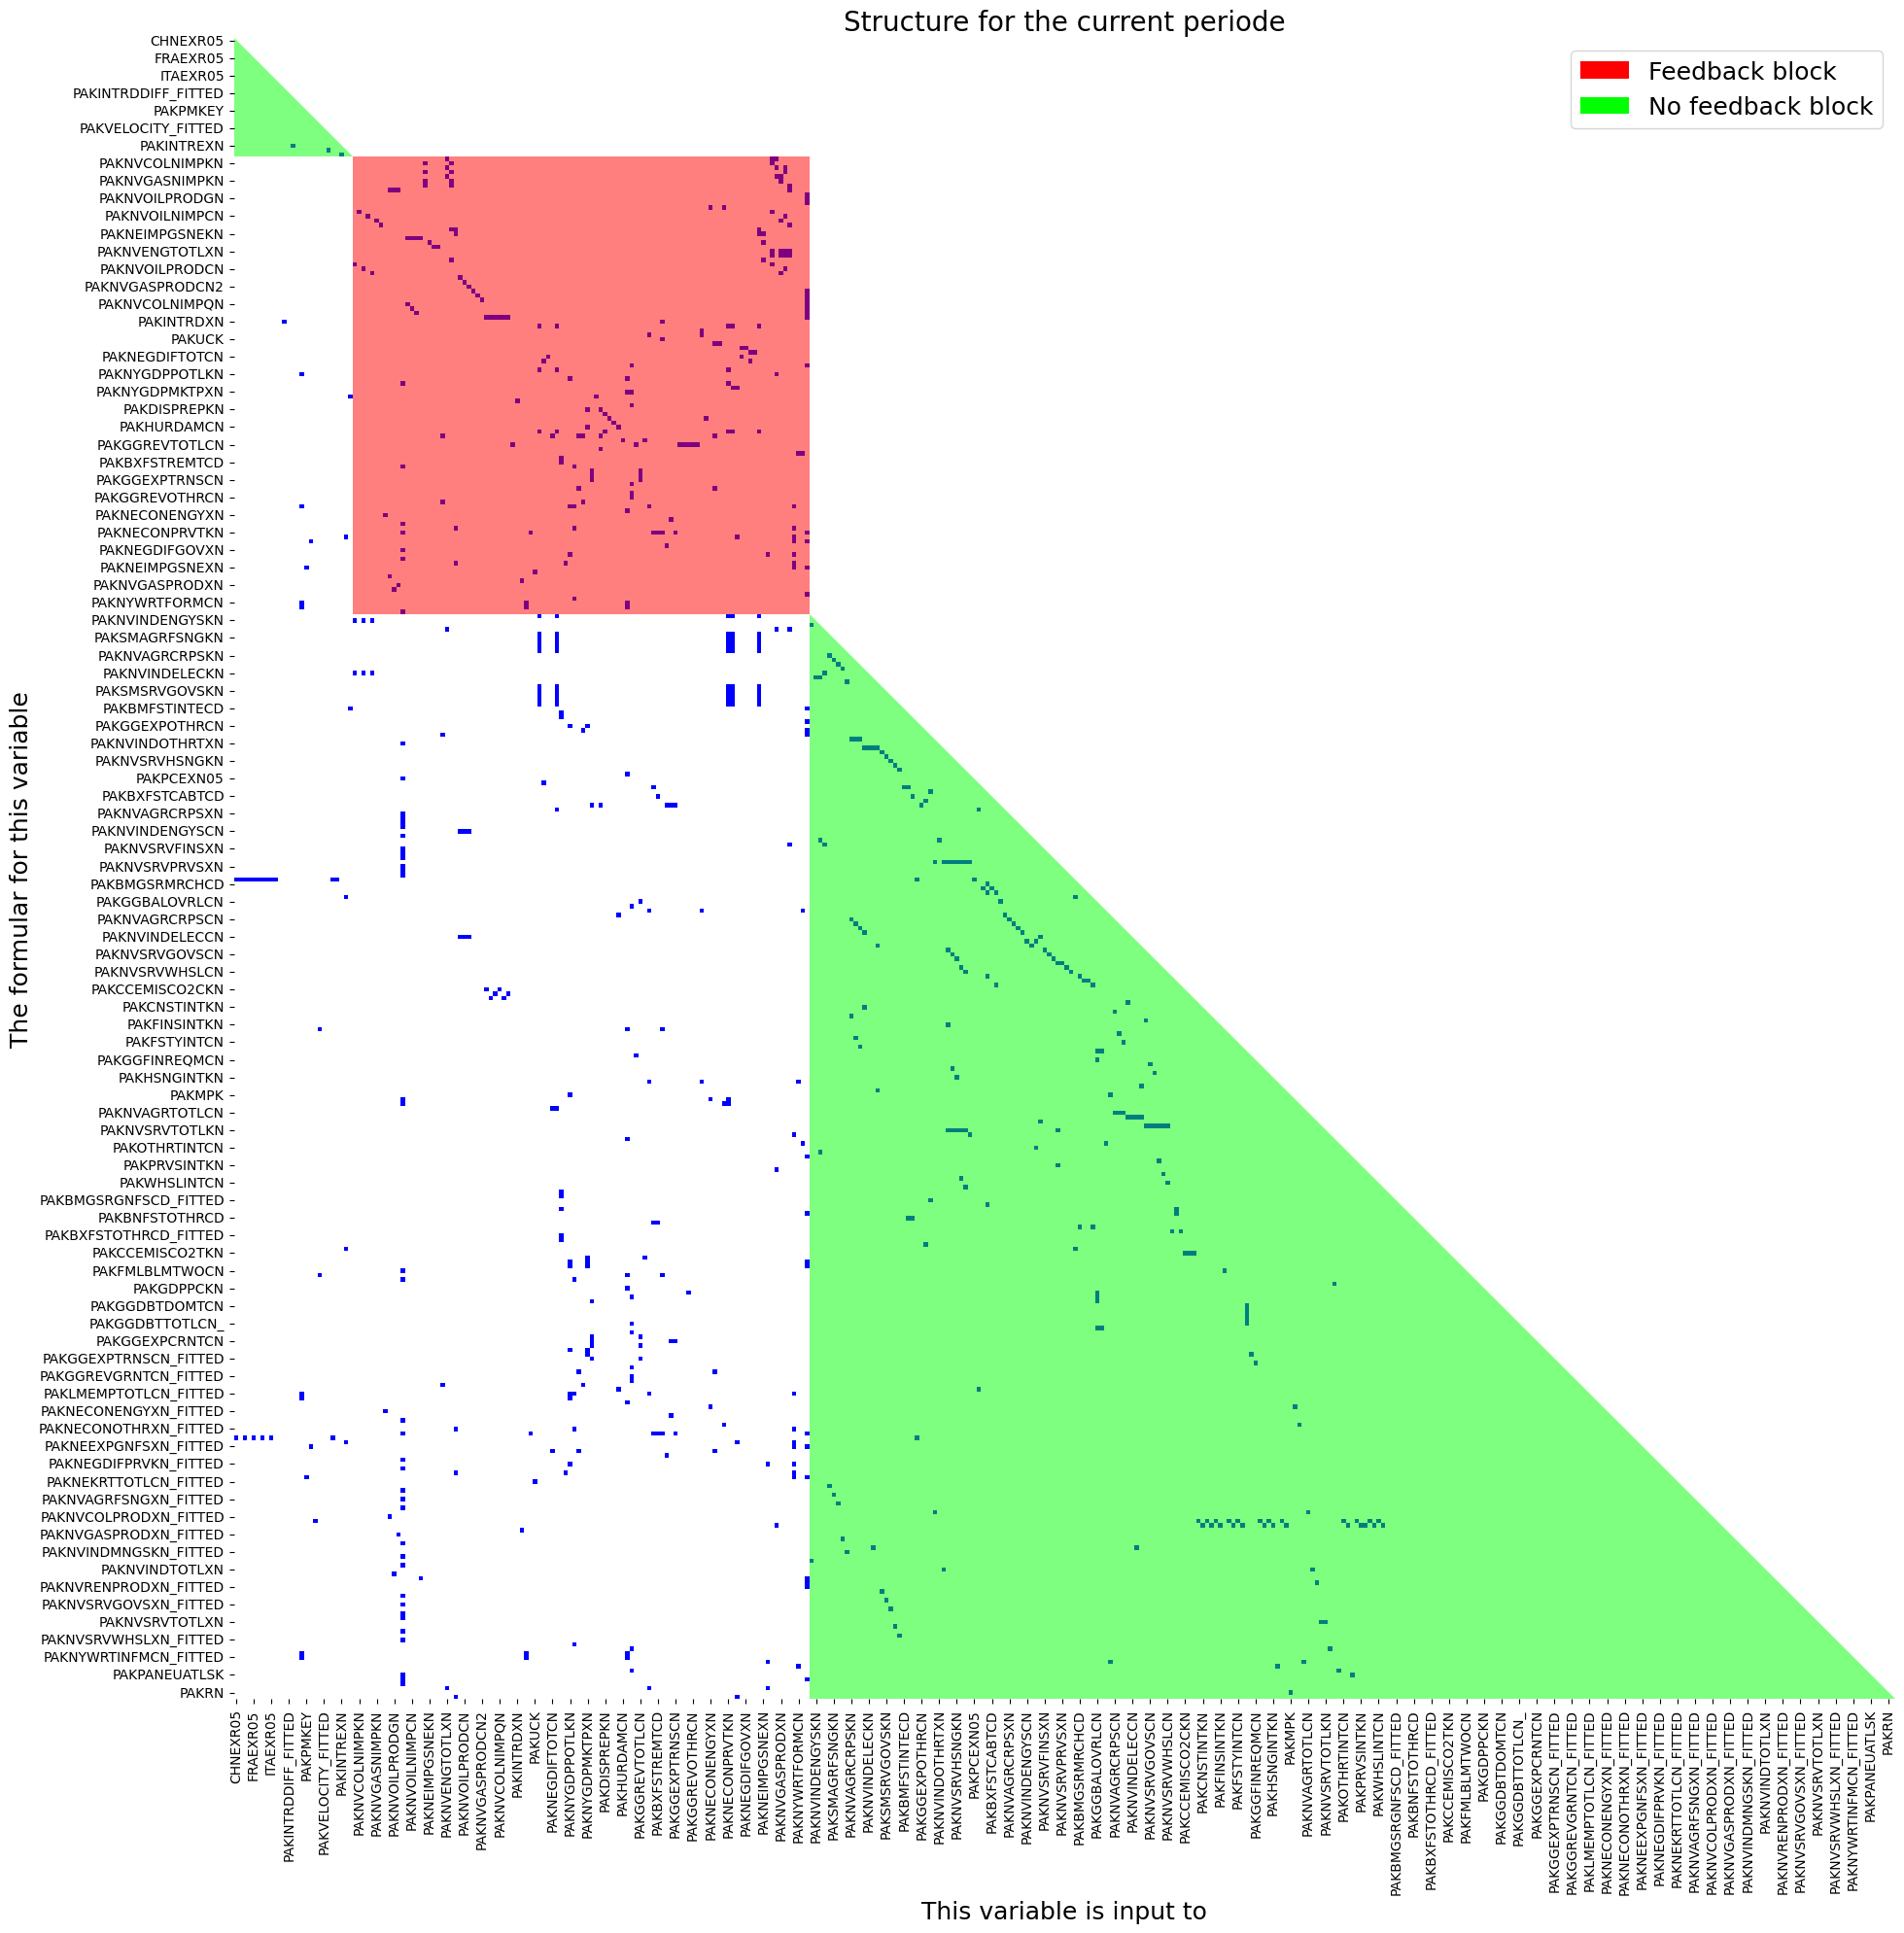

In [20]:
mpak.plotadjacency(size=(20,20),title='Structure for the current periode');

:::{index} double: model instance; .current_per, Master time index
:::


## Setting time frame
The property `.current_per` is the master time index for a model instance. It determinate the time frame for simulations  and output. 

Sometime it can be useful to change the `.current_per` the property can be set with: 

| **Function**           | **Description**                                                        |
|-------------------------|------------------------------------------------------------------------|
| `.smpl`                 | Sets the sample period for analysis and reporting.                    |
| `with .set_smpl:`             | Sets the sample period for analysis and reporting in a local scope .            |
| `with .set_smpl_relative:`    | Sets the sample period for analysis and reporting relative to the current period or scenario in a local scope.|


In [21]:
mpak.current_per

Index([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055,
       2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067,
       2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079,
       2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64')

The possible times in the dataframe is contained in the ```<dataframe>.index``` property. 

In [22]:
mpak.lastdf.index  # the index of the dataframe

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       ...
       2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64', length=121)

### .smpl, Set time frame 
The time frame can be set like this:

In [23]:
mpak.smpl(2020,2025)
mpak.current_per

Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')

(set_smpl)=
### .set_smpl, Set timeframe for a local scope
For many operations it can be useful to apply the operations for a shorter time frame, but retain the global time frame after the operation. <br>
This can be done  with a ```with``` statement like this. 

In [24]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl(2022,2023):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

Global time  before   Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Local time frame      Index([2022, 2023], dtype='int64')
Unchanged global time Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


### .set_smpl_relative Set relative timeframe for a local scope
When creating a script it can be useful to set the time frame relative to the 
current time. 

Like this:

In [25]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl_relative (-1,0):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

Global time  before   Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Local time frame      Index([2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Unchanged global time Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


## Reports

ModelFlow offers a range of features to present and visualize model results. Below is a list:

- **`.table()`**:  
  This function creates a table from data in the `.lastdf` and `.basedf` dataframes. It can be customized with various arguments to adjust the data type (e.g., growth rate or level), the number of decimals, and table titles.

- **`.plot()`**:  
  This function generates charts based on data from `.lastdf`, `.basedf`, or  saved scenarios in from `.keep_solution`. It can be customized with various arguments to choose the chart type, data transformation (e.g., growth rate or level), scenarios to display, and chart titles.

- **`.text()`**:  
  This function creates a text object that can contain plain text, LaTeX code, or HTML code. It is primarily used to add text to reports.

- **`.report()`**:  
  This function combines tables, plots, text, and other reports into a consolidated report. Reports can be saved and reused, making it easy to generate reports for various scenarios.


### The `.table` function

**Line Options**  
These options are set on table creation.

| Argument            | Default Value             | Description                                               |
|---------------------|---------------------------|-----------------------------------------------------------| 
| pat                 | '#Headline' (defined in the `ModelFlow` class)| Variable names to be displayed, may include wildcard specifications. |
| datatype            | 'growth'                  | Defines the data transformation displays (cf. next table). |
| mul                 | 1.0                       | Multiplier of values before display.                      | 
| dec                 | 2                         | Set the decimal places to display.                        |
| col_desc            | Depend on datatype            | A centered description of columns (non-transposed table). |
| heading             | ''                        | A centered text above columns (non-transposed table).     |
| rename              | True                      | If True, use descriptions; else, use variable names.      |



**Table Options**  
These options can be revised after a table has been generated.

| Argument            | Default Value             | Description                                               |
|---------------------|---------------------------|-----------------------------------------------------------|
| name                | ''                        | Name for this display.                                    |
| custom_description  | {}                        | Custom description, overrides default descriptions.       |
| title               | ''                        | Title text for the table.                                 |
| foot                | ''                        | Footer text for the table.                                |
| transpose           | False                     | If True, transposes the table.                            |
| chunk_size          | 0                         | Specifies the number of columns per chunk in tables.      |
| timeslice           | []                        | Specifies the time slice for data display.                |
| max_cols            | 6                         | Maximum columns when displayed as string.                 |
| last_cols           | 1                         | In LaTeX, the number of last columns in a display slice.  |
| smpl                | ('', '')                  | Set or reset the sample (`smpl`) for the table.           |


**Table: Data Types and Their Meanings**

| **datatype**    | **Meaning** |
|:-------------|:------------------------------------------------------------------|
| **growth**  | This is the default setting. Growth rate in percent in the most recent dataset (`.lastdf`).|
| level       | Values in `.lastdf`.                                            |
| gdppct      | Percentage of GDP in `.lastdf`.                                  |
| qoq_ar      | Quarterly growth annualized. - Quarterly models only.|
| **Difference views** | `` |
| difgrowth   | Change ($\Delta$) in growth rates (`.lastdf` less `basedf`).   |
| diflevel    | Change ($\Delta$) in values (`.lastdf` less `basedf`).         |
| difgdppct   | Change ($\Delta$) in the percentage of GDP from (`.lastdf` less `basedf`). |
| difqoq_ar      | change in the annualized quarterly growth (`.lastdf` less `basedf`)  |
| difpctlevel | Percentage change ($\Delta$) in values (`.lastdf` less `basedf`). |
| **Values from  `.basedf`** | `` |
| basegrowth  | Growth rate in percent in `.basedf`.|
| baselevel   |Level of the data in `.basedf`|
| basegdppct  | Percentage of GDP in `.basedf`.|
| baseqoq_ar  | Quarterly growth in `.basedf`|


### The `.plot` function

**Line options** are set when the plot is created with the `.plot() `call and can only be set when the object is instantiated.

| Argument           | Default Value             | Description   |
|--------------------|---------------------------|----------------------------------------|
| pat                | '#Headline'               | Pattern with wildcard for variable names |
| datatype           | 'growth'                  | Defines the datatransformation displayes (cf. next table)     |
| mul                | 1.0                       | Multiplier of values before display             | 
| ax_title_template | ''                        | Template for each chart title| 
|by_var            | True|Show results by variable (False) or scenario (True)|


**Plot options** can be revised after the plot has been created. 

| Argument           | Default Value             | Description   |
|--------------------|---------------------------|----------------------------------------|
| rename             | True                      | If True use descriptions else variable names    |
| scenarios               | ''                        | Show for `.basedf/.lastdf` or selected scenarios                        | 
| name               | ''                        | Name for this display.                           | 
| custom_description | {}                        | Custom description, override default descriptions. |
title              | ''                        | Title (used when samefig=True).                  | 
| samefig            | False                     | If True, displays all chart in the same plot area. |
| ncol               | 2                         | Number of columns when samefig=True.            | 
| size               | (10, 6)                   | Specifies the size of each chart                | 
| legend             | True                      | If True, includes a legend in the display.       |
| smpl             | ('','')                      | set smpl for this plot       | 


The table below summarizes how the combination of `datatype` and `scenarios` determines the data displayed in the chart.

**Table: Datatype and Scenario Settings**

| **Datatype**    | **scenarios=''** or omitted | **scenarios='\<list of scenarios>'** (Multiple Scenarios) |
|:-------------|:------------------------------------------------------------------|:-----------------------------|
| **Value Views** | | |
| **growth** (default) | Growth rate (%) in the most recent dataset (`.lastdf`). | Growth rates for all scenarios. |
| **level**       | Values from `.lastdf`. | Values for all scenarios. |
| **gdppct**      | Percentage of GDP in `.lastdf`. | Percentage of GDP for all scenarios. |
| **qoq_ar**      | Quarterly growth (annualized) for quarterly models in `.lastdf`. | Quarterly growth (annualized) for all scenarios. |
| | | |
| **Difference Views** | | |
| **difgrowth**   | Change ($\Delta$) in growth rates between `.lastdf` and `.basedf`. | Change ($\Delta$) in growth rates between the first and other scenarios. |
| **diflevel**    | Change ($\Delta$) in values between `.basedf` and `.lastdf`. | Change ($\Delta$) in values between the first and other scenarios. |
| **difgdppct**   | Change ($\Delta$) in the percentage of GDP between `.basedf` and `.lastdf`. | Change ($\Delta$) in the percentage of GDP between the first and other scenarios. |
| **difqoq_ar**   | Change in quarterly growth (annualized) between `.basedf` and `.lastdf`. | Change ($\Delta$) in quarterly growth (annualized) between the first and other scenarios. |
| **difpctlevel** | Percentage change ($\Delta$) in values between `.basedf` and `.lastdf`. | Percentage change ($\Delta$) in values between the first and other scenarios. |
| | | |
| **`.basedf` Views** | | |
| **basegrowth**  | Growth rate (%) in `.basedf`. | Growth rates for the first scenario. |
| **baselevel**   | Values from `.basedf`. | Values for the first scenario. |
| **basegdppct**  | Percentage of GDP in `.basedf`. | Percentage of GDP for the first scenario. |
| **baseqoq_ar**  | Quarterly growth (annualized) in `.basedf`. | Quarterly growth (annualized) for the first scenario. |


#### `.savefigs()` Saving plots in other formats. 

Plots are created using the `matplotlib` library. If charts are going to be used further downstream they can be saved to file using a wide range of formats. 

**`.savefigs()` options**

| **Parameter**      | **Type**  | **Description**                                                                                        | **Default**       |
|--------------------|-----------|--------------------------------------------------------------------------------------------------------|-------------------|
| `location`         | `str`     | The  folder in which to save the charts.                                                           | `'./graph'`       |
| `experimentname`   | `str`     | A subfolder under `location` where charts are saved.                                                   | `'experiment1'`   |
| `addname`          | `str`     | An additional name added to each figure filename.                                                      | `''` (empty string) |
| `extensions`       | `list`    | A list of  file extensions for saving the figures.                                               | `['svg']`         |
| `xopen`            | `bool`    | If `True`, open the saved figure locations in a web browser.                                           |                   |


Charts can be saved using the following formats: 

| **Extension**     | **Description**                             |
|-------------------|---------------------------------------------|
| `.png`            | Portable Network Graphics                   |
| `.jpg` or `.jpeg` | t Photographic Experts Group            |
| `.tif` or `.tiff` | Tagged Image File Format                    |
| `.bmp`            | Bitmap                                      |
| `.gif`            | Graphics Interchange Format                 |
| `.svg`            | Scalable Vector Graphics                    |
| `.pdf`            | Portable Document Format                    |
| `.eps`            | Encapsulated PostScript                     |
| `.ps`             | PostScript                                  |
| `.raw`            | Raw image data                              |
| `.rgba`           | Raw RGBA bitmap                             |
| `.pgf`            | Portable Graphics Format                    |



### The `.text()` class
The text class allows the user to define three different types of text: `.text_text` `.html_text` and `.latex_text`.  These properties are optional and can be declared explicitly or implicitly. 


 |object|delimited by |contains|
 |------|---------|---|
 |.text_text| nothing |Plain text |
 |.html_text|\<html> \</html> |html text  |
 |.latex_text|\<latex> \</latex> |latex text |


### Joing plots or tables with  `|` 

Tables, Plots can be concatenated together using the `|`  operator. This allows plots or tables with different  datatypes to be displayed together. 

Plots can only be joined with plots, and tables can only be joined by tables.

### Creating reports using `+` between plots, tables and text 
`Report`s in `ModelFlow` are containers that can contains figures, plots, tables of different dimension and text. Moreover, `Report` objects can be saved in a model object and regenerated on new data without requiring any additional effort by the user.

The `+` operator creates a new report container specification. 

Reports can be placed in the dictionary: `model instance.reports`.Reports can then be reused later. 


 |Functions | task|
 |------|---------|
 |`model instance.add_report(reports,,,)`| Add report to `model instance.reports`, key = report name|
 |`model instance.get_report(key)`|Returns a report from `model instance.reports` |
 
 
A report can be modified with these functions. 
 |Functions | task|
 |------|---------|
 |.set_scenarios|Set scenarios in report |
 |.set_name|Sets name of report|


### `.set_option()` Modifying reports, tables or plots options
With this function options (except line options)  can be modified after the element has been created.  

### Rendering reports, tables, plots and text objects 

These  objects can be rendered as html, text and pdf objects. The below table indicates the methods associated with each.

**Display options for report type  objects**

|command|output|
|:--|:--:
|None (just the object name)| In `Jupyter Notebook` displays the table in its html format.|
|display(tab)|Displays the table in html format.|
|.show|Returns a simple text version of the table.|
|.pdf()|Returns a nicely formatted table in pdf format.|



In [26]:
mpak.keep_solutions.keys() 

dict_keys(['Baseline', '$25 increase in oil prices 2025-27', 'Coal, Oil and Gastax : 20', 'Coal, Oil and Gas Carbon tax = 40 USD'])

In [27]:
pat=  ' *NYGDPMKTPKN *NECONPRVTKN  '
tab = mpak.table(pat=pat,name='My_first_table')

In [28]:
pat_gov = '*GGBALOVRLCN *GGDBTTOTLCN *BNCABFUNDCD'
tab_gov = mpak.table(pat_gov,datatype='gdppct',dec=1)
(tab|tab_gov).set_options(smpl=(2022,2026),
    title='{cty_name} GDP components').show

Pakistan GDP components
                                              2022   2023   2024   2025   2026
                                                   --- Percent growth ---     
Real GDP                                      0.45   0.71   1.32   1.90   2.32
HH. Cons Real                                 0.41   0.73   1.36   1.94   2.34
                                                   --- Percent of GDP ---     
General Government Revenue, Deficit, LCU mn   -3.5   -3.5   -3.4   -3.3   -3.2
General government gross debt millions lcu    54.9   55.0   55.4   56.0   56.7
Current Account Balance, US$ mn               -4.4   -3.8   -3.5   -3.3   -3.2




Pakistan GDP components
                                              2022   2023   2024   2025   2026
                                                   --- Percent growth ---     
Real GDP                                      0.45   0.71   1.32   1.90   2.32
HH. Cons Real                                 0.41   0.73   1.36   1.94   2.34
                                                   --- Percent of GDP ---     
General Government Revenue, Deficit, LCU mn   -3.5   -3.5   -3.4   -3.3   -3.2
General government gross debt millions lcu    54.9   55.0   55.4   56.0   56.7
Current Account Balance, US$ mn               -4.4   -3.8   -3.5   -3.3   -3.2




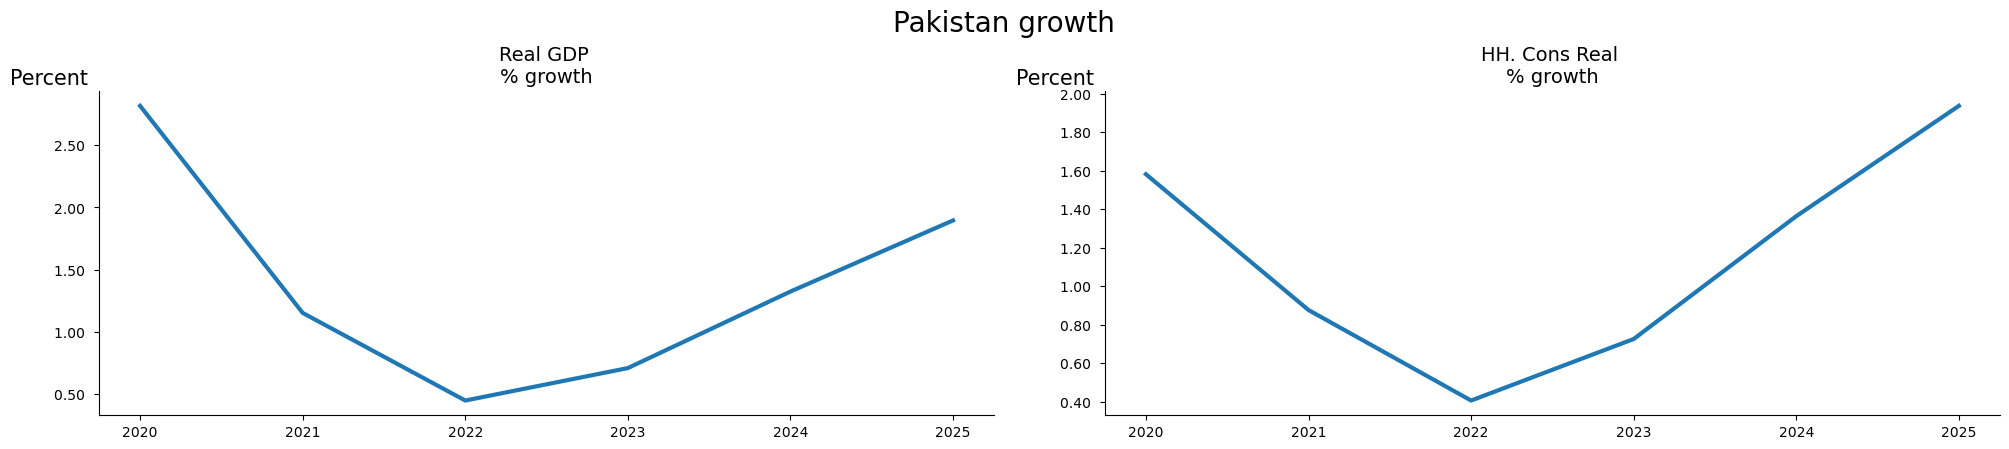

In [29]:
fig = mpak.plot(pat,samefig=2,title='{cty_name} growth')
((tab|tab_gov).set_options(smpl=(2022,2026),
    title='{cty_name} GDP components')+fig).show

(index-operator)=

:::{index} single: model instance; Index operator []
:::

:::{index} single: model instance;[] To select and visualize variables
:::

:::{index} single: model instance; Wildcard search on variable descriptions the ! operator
:::

:::{index} single: Wildcard searches| The ! operator: search on variable descriptions 
:::


## Using the index operator .[ ] to select and visualize variables. 

Using the index operator on the model instance like this: 
>mpak[\<variable selection>]

will return a special class (called ```.vis```). It implements a number 
of methods and properties which comes in handy for quick variable:
 - vizualization
 - analysis
 - information     

First the user has to select the relevant variables then several properties and methods can be chained



(variable-selection)=

:::{index} single: Variable selection
:::


### Variable selection
In several contexts it is possible to select a number of variables. Variables can be selected on different basis: 
 1. Variable name with wildcards 
 2. Variable descriptions with wildcarts 
 3. Variable groups
 4. all endogenous variables

:::{index} single: Variable selection; Variable names with wildcards 
:::

#### '\<variable name with wildcards>'...  , select matching variables

To select variables the method accept patterns which defines variable names. Wildcards: 
- ```*``` matches everything
- ```?``` matches any single character
- ```\[seq]``` matches any character in seq
- ```\[!seq]``` matches any character not in seq



For more how wildcards can be used, the specification can be found [here](https://docs.python.org/3/library/fnmatch.html)


:::{index} single: Variable selection; Use of {cty}
:::

:::{index} single: Variable selection; Deferred substitution 
:::
#### Use of {cty} and deferred substitution in variable selection
Using * or ? to select variables will include all countries, even if some may not be relevant in a particular selection.
In order to reuse the same variable selection across different countries deffered substitution can be used. 

In this approach, {cty} placeholders can be used. {cty} will be replaced with the ISO 3 letter code for the country in question. And this is done at the execution time - explaining the "deferred" term. 

For this to work, a dictionary <model instance>.substitution must be defined. This dictionary is typically set in the onboarding script but can be set at any point as needed.

Here ???exr05 will select EXR05 for all countries 

In [30]:
mpak['???exr05'].names

['CHNEXR05',
 'DEUEXR05',
 'FRAEXR05',
 'GBREXR05',
 'ITAEXR05',
 'PAKEXR05',
 'TUREXR05',
 'USAEXR05']

Here ?only the pakistan value is selected. 

If the model is used for another country the cty can be changed, without changing the specification 

In [31]:
mpak['{cty}exr05'].names

['PAKEXR05']

:::{index} single: model instance; .substitution, Defining deferred substitution
:::

#### `.substitution` Defining deferred substitution
To enable reuse of variable selection and report specification this feature enable substitution of {key} in a string with `<model instance>.substitution['key']` where `.substitution` is a dictionary. 

When onboarding a World Bank model the `<model instance>.substitution` looks like this: 

In [32]:
mpak.substitution 

{'cty': 'PAK', 'cty_name': 'Pakistan'}

Deferred substitution works with variable selection, report titles and report text. 

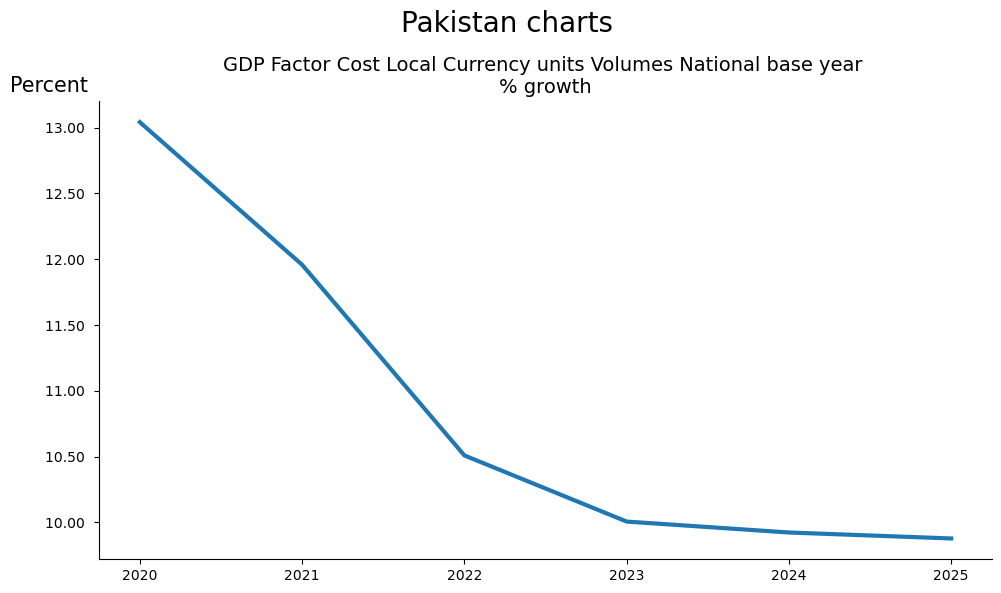

In [33]:
mpak['{cty}NYgdpFCSTCN'].endo_nofit.rplot(datatype='growth',
      title='{cty_name} charts',rename=False).show

:::{index} single: Variable selection; # Variable groups
:::
#### '\<#Variable group>' , select variables matching in variable group 

:::{index} single: model instance; .var_groups, a dictionary of variable groups
:::

#### .var_groups, a dictionary of variable groups 
The property `.var_groups` can contain a dictionary of variables defined by variable names with wildcards. 

In [34]:
mpak.var_groups


{'Headline': '{cty}NYGDPMKTPKN {cty}NYGDPMKTPXN {cty}NRTOTLCN {cty}LMUNRTOTLCN {cty}BFFINCABDCD  {cty}BFBOPTOTLCD {cty}GGBALEXGRCN {cty}GGDBTTOTLCN_ {cty}GGDBTTOTLCN {cty}BNCABLOCLCD_ {cty}FPCPITOTLXN {cty}CCEMISCO2TKN',
 'National income accounts': '{cty}NY*',
 'National expenditure accounts': '{cty}NE*',
 'Value added accounts': '{cty}NV*',
 'Balance of payments exports': '{cty}BX*',
 'Balance of payments exports and value added ': '{cty}BX* {cty}NV*',
 'Balance of Payments Financial Account': '{cty}BF*',
 'General government fiscal accounts': '{cty}GG*',
 'World all': 'WLD*',
 'All variables': '*'}

#### Example

In [35]:
mpak['#Balance of payments exports'].des

PAKBXFSTCABTCD        : Exp., Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD        : Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_A      : Add factor:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_D      : Fix dummy:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_FITTED : Fitted  value:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTOTHRCD_X      : Fix value:Exp., Other Factor Services and Transfers (BOP), US$ mn
PAKBXFSTREMTCD        : Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_A      : Add factor:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_D      : Fix dummy:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_FITTED : Fitted  value:Exp., Remittances (BOP), US$ mn
PAKBXFSTREMTCD_X      : Fix value:Exp., Remittances (BOP), US$ mn
PAKBXGSRGNFSCD        : Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_A      : Add factor:Exp., GNFS (BOP), US$ mn
PAKBXGSRGNFSCD_D      : Fix dummy:Exp., GNFS (B


#### '\<!search pattern>' , select variables where search pattern with  wildcards is matching description  

:::{index} single: Variable selection; ! Variable descriptions  
:::

:::{index} single: model instance;  .var_descriptions, a dictionary of variable descriptions 
:::


#### .var_descriptions, a dictionary of variable descriptions 
The property `.var_description` contains a dictionary with variable names as key and a description as value. 

#### Example

In [36]:
mpak['!*import*'].des

PAKBMFSTINTECD        : Imports, External Debt Interest Payments
PAKNEIMPGNFSKN        : Imports real
PAKNEIMPGNFSKN_A      : Add factor:Imports real
PAKNEIMPGNFSKN_D      : Fix dummy:Imports real
PAKNEIMPGNFSKN_FITTED : Fitted  value:Imports real
PAKNEIMPGNFSKN_X      : Fix value:Imports real
PAKNVCOLNIMPQN        : Coal, net import (ktoe)
PAKNVGASNIMPQN        : Gas, net import (ktoe)
PAKNVOILNIMPQN        : Oil, net import (ktoe)
PAKNVRENNIMPQN        : "Renewables", net import (ktoe)
PAKPMKEY              : Keyfitz Price Imports


:::{index} single: Variable selection; #ENDO all endogenous variables  
:::
#### '#ENDO' , select all edogenous variables  

In [37]:
# Show the first 4 names of endogenous variables
mpak['#endo'].names[:4]

['CHNEXR05', 'CHNPCEXN05', 'DEUEXR05', 'DEUPCEXN05']

### Access values in .lastdf and .basedf

To limit the output printed, we set the time frame to 2020 to 2023. 

In [38]:
mpak.smpl(2020,2023);



To access the values of 'PAKNYGDPMKTPKN' and 'PAKNECONPRVTKN' from the latest simulation a small widget is displayed. 

In [39]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'] 

:::{image} widget_ref_1.png
    :alt: Menu to start notebooks in subfolders
    :class: bg-primary mb-1
    :width: 85%
    :align: center
:::    

:::{index} single: model instance[]; .base Access basedf 
:::

To access the values of 'PAKNYGDPMKTPKN' and 'PAKNECONPRVTKN' from the base dataframe, specify .base

In [40]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].base.df


,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,2.627394e+07,2.367289e+07
2021,2.651137e+07,2.397282e+07
2022,2.668514e+07,2.416413e+07
2023,2.696308e+07,2.442786e+07


:::{index} single: model instance[]; .df Return a dataframe 
:::


### .df  Pandas dataframe 

Sometime you need to perform additional operations on the values. Therefor the .df will return a dataframe with the selected variables. 


In [41]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].df

,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,2.648605e+07,2.338267e+07
2021,2.679140e+07,2.358771e+07
2022,2.691168e+07,2.368379e+07
2023,2.710269e+07,2.385588e+07


:::{index} single: model instance[]; .names Variable names
:::

### .names Variable names

If you select variables using wildcards, then you can access the names that correspond to your query.



In [42]:
mpak['PAKNYGDP??????'].names

['PAKNYGDPDISCCN',
 'PAKNYGDPDISCKN',
 'PAKNYGDPFCSTCN',
 'PAKNYGDPFCSTKN',
 'PAKNYGDPFCSTXN',
 'PAKNYGDPMKTPCD',
 'PAKNYGDPMKTPCN',
 'PAKNYGDPMKTPKD',
 'PAKNYGDPMKTPKN',
 'PAKNYGDPMKTPXN',
 'PAKNYGDPPOTLKN']

:::{index} single: model instance[]; .rename() Rename variables to description 
:::



### .rename() replaces the variable mnemonic with its description

Use .rename() to display results using the variable description instead of the mnemonic, which is the default behavior. 



In [43]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].rename().df

,Real GDP,HH. Cons Real
2020,2.648605e+07,2.338267e+07
2021,2.679140e+07,2.358771e+07
2022,2.691168e+07,2.368379e+07
2023,2.710269e+07,2.385588e+07


:::{index} single: model instance[]; Transformations 
:::

:::{index} single: model instance[]; .growth/.dif  Growth rates
:::

:::{index} single: model instance[];  .dif - difference in level
:::

:::{index} single: model instance[];  .difgrowth/.difpct - difference in growth rate
:::

:::{index} single: model instance[];  .difpctlevel - difference in level as a pct of baseline
:::

:::{index} single: model instance[];  .yoy_ar - Growth over 4 periods 
:::

:::{index} single: model instance[];  .qoq_ar - Annualized quarterly growth rate
:::


### Transformations of solution results 

When the variables has been selected through the index operator a number of standard data transformations can be performed. 

|Transfomation|Meaning|expression 
|:--- |:--- |:--|
| growth (pct) | Growth rates | $\frac{this_t}{this_{t-1}} -1$ |
| dif |Difference in level | $l-b$ |
| difgrowth (difpct) | Difference in growth rate | ${\big[{\frac{l_t}{l_{t-1}}-1}\big]-\big[{\frac{b_t}{b_{t-1}}-1}\big]}$|
| difpctlevel |difference in level as a pct of baseline | $\frac{l_t-b_t}{b_t} $ |

- $this$ is the chained value. Default lastdf but if preceeded by .base the values from .basedf will be used 
- $b$ is the values from .basedf
- $l$ is the values from .lastdf 


### .dif Difference in level 

The 'dif' command displays the difference in levels of the latest and previous solutions.

$l-b$

where l is the variable from the .lastdf and b is the variable from .basedf.  

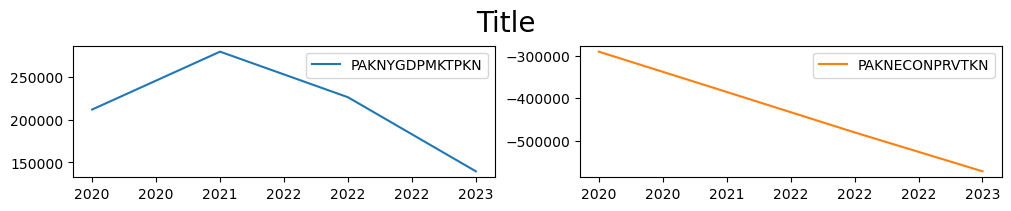

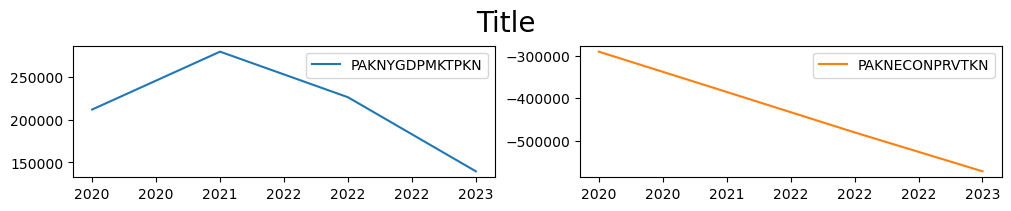

In [44]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dif.plot()

### .growth (.pct)  Growth rates 
Display growth rates

$\left(\cfrac{l_t}{l_{t-1}}-1\right )$

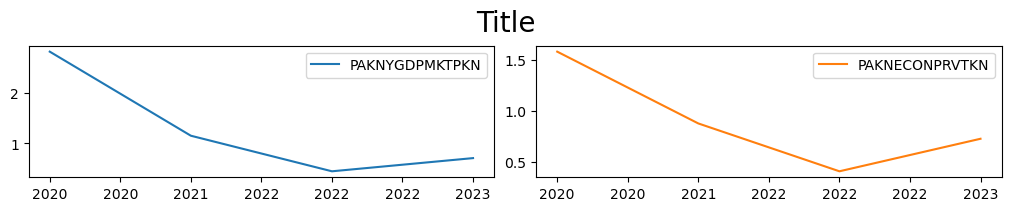

In [45]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].growth.plot();

### .difpct property difference in growth rates 
The difference in the growth rates  between the last and base dataframe.  

$\left( \cfrac{l_t}{l_{t-1}}-1 \right) - \left(\cfrac{b_t}{b_{t-1}}-1 \right)$

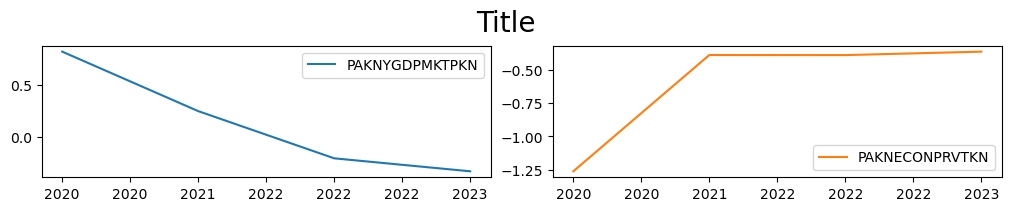

In [46]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.plot() ; 

### .difpctlevel percent difference of  levels 

$\left( \cfrac{l_t-b_t}{b_{t}} \right) $

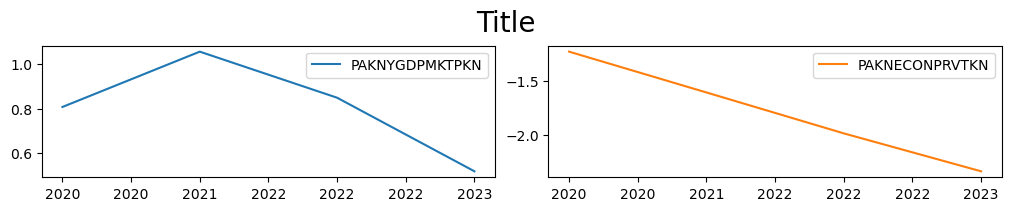

In [47]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpctlevel.plot();  

### .yoy_ar  Growth over 4 periods 
This should only be used for quarterly data 

$\left( \cfrac{l_t-b_{t-4}}{b_{t-4}} \right)-1 $

### .qoq_ar Annualized quarterly growth rate
Also for quarterly data 


$\left( \cfrac{l_t-b_t}{b_{t}} \right)^4-1 $


## .plot chart the selected and transformed variables
After the variables has been selected and transformed, they can  be plotted. The .plot() method plots the selected variables separately

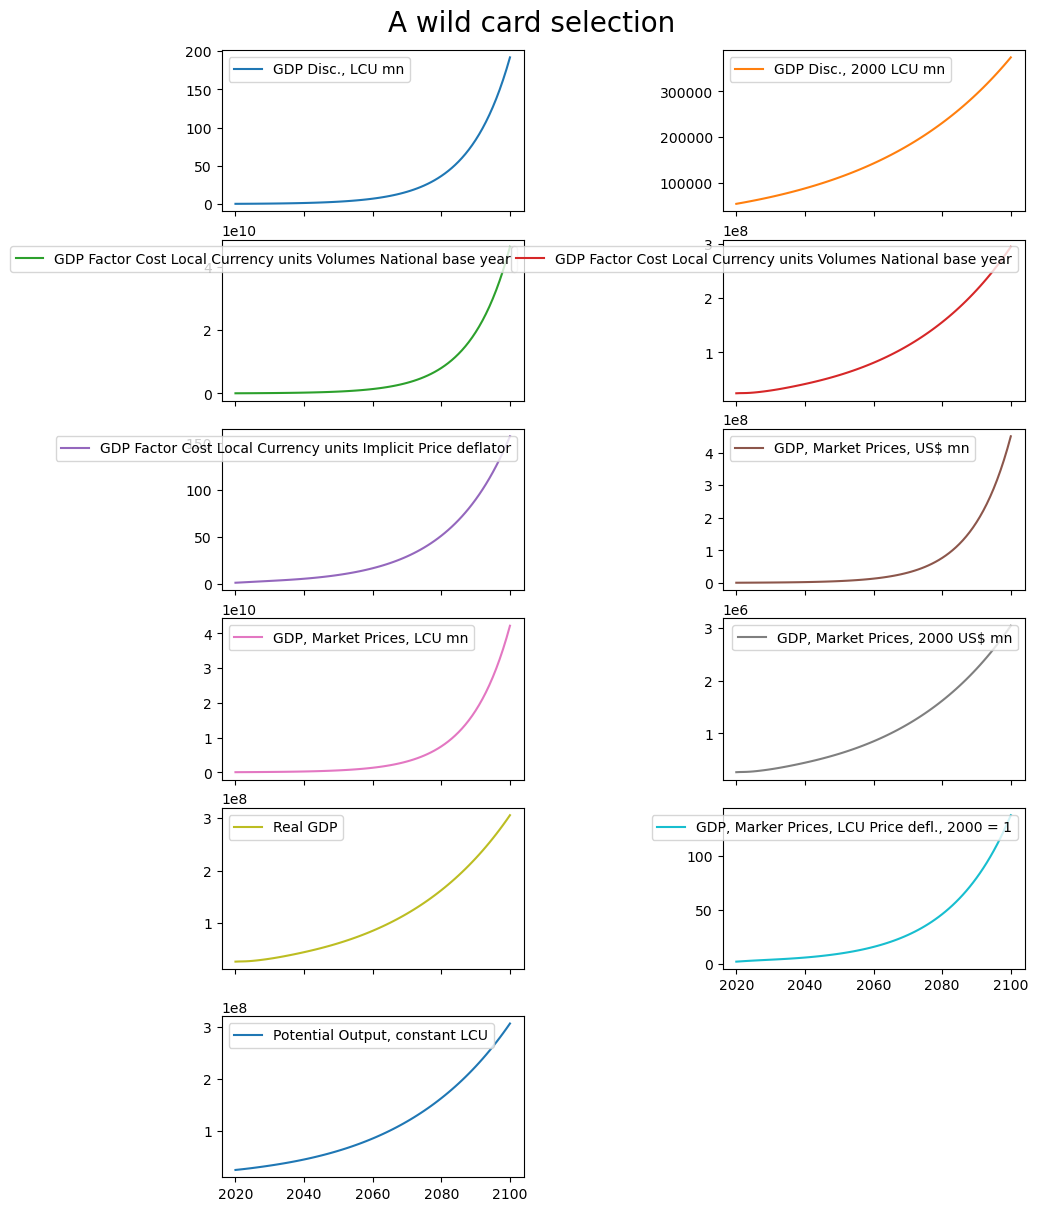

In [48]:
mpak.smpl(2020,2100);

mpak['PAKNYGDP??????'].rename().plot(title="A wild card selection");

### Options to plot() 

Common:<br>
- title (optional): title. Defaults to ''.
- colrow (TYPE, optional): Columns per row . Defaults to 2.
- sharey (TYPE, optional): Share y axis between plots. Defaults to False.
        
        
More excotic:<br>         
- splitchar (TYPE, optional): If the name should be split . Defaults to '__'.
- savefig (TYPE, optional): Save figure. Defaults to ''.
- xsize  (TYPE, optional): x size default to 10 
- ysize  (TYPE, optional): y size per row, defaults to 2
- ppos (optional): # of position to use if split. Defaults to -1.
- kind (TYPE, optional): Matplotlib kind . Defaults to 'line'.


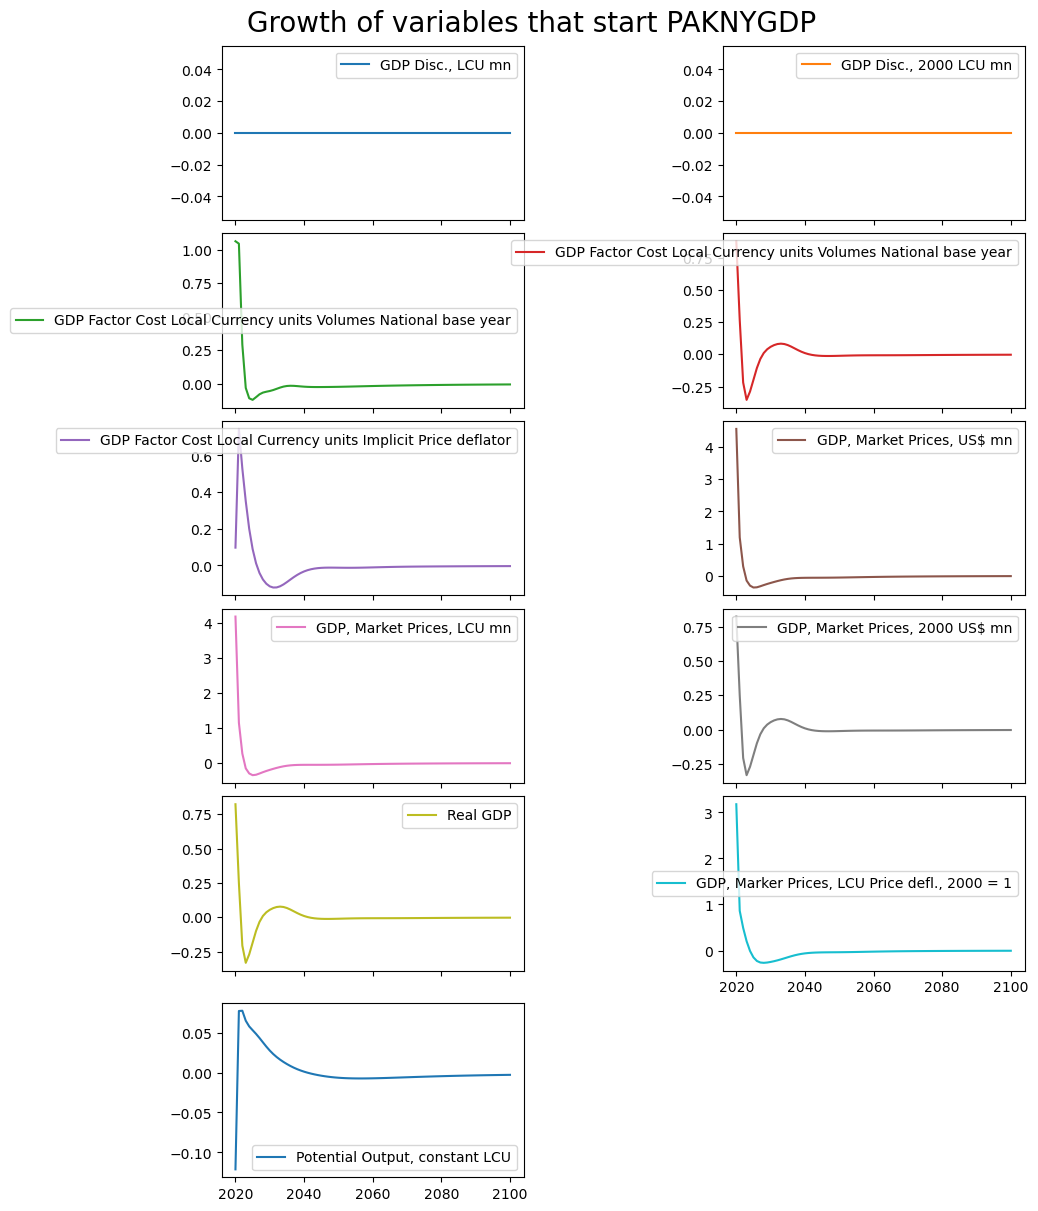

In [49]:
mpak['PAKNYGDP??????'].difpct.rename().plot(title='Growth of variables that start PAKNYGDP');

## [].rtable and [].rplot - reports from []
Report tables and plots can also be created directly from the variable selector `[]`. The purpose is to enable easy reuse of variable selection. 

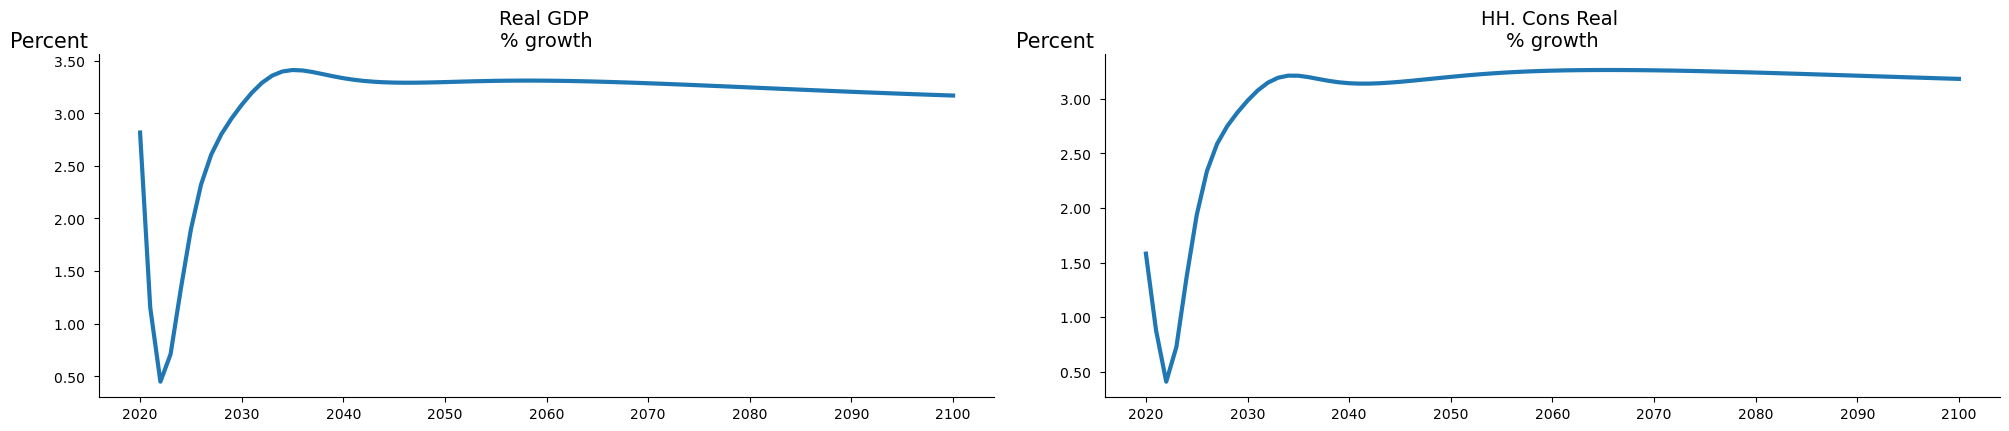

In [50]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].rplot(samefig=1).show 

## Plotting inspiration


The following graph shows the components of GDP using the values of the baseline dataframe. 

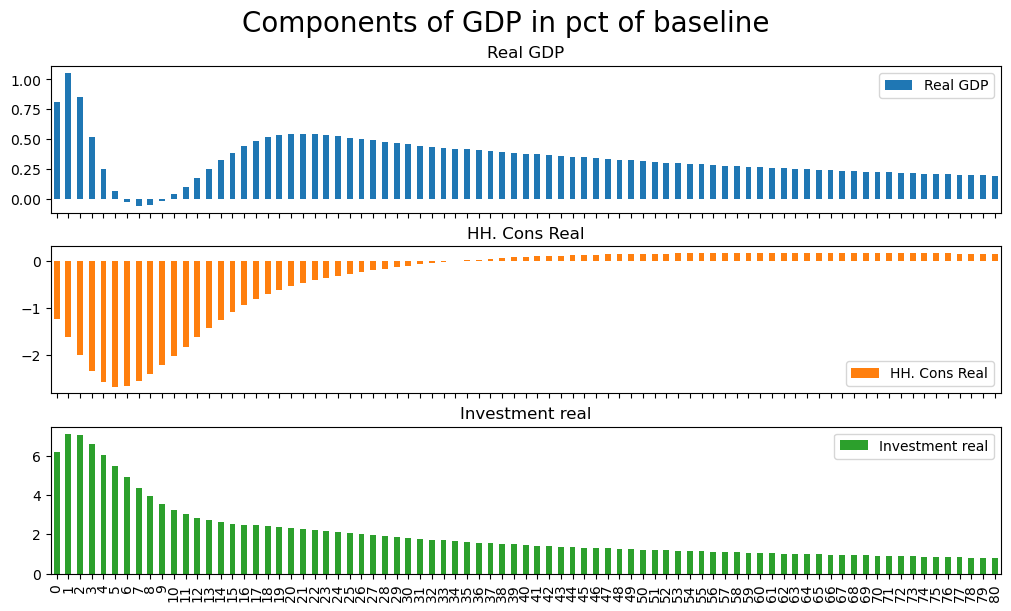

In [51]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN'].\
difpctlevel.rename().\
plot(title='Components of GDP in pct of baseline',colrow=1,kind='bar') ;

###  Heatmaps

For some model types heatmaps can be helpful, and they come out of the box. This feature was developed for use by bank stress test models. 

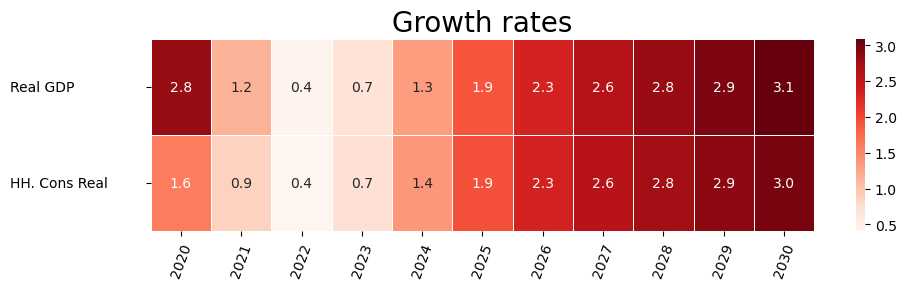

In [52]:
with mpak.set_smpl(2020,2030):
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.rename().heat(title='Growth rates',annot=True,dec=1,size=(10,3))  


<a id=’With’></a>
### Violin and boxplots, 
Not obvious for macro models, but useful for stress test  models with many banks. 

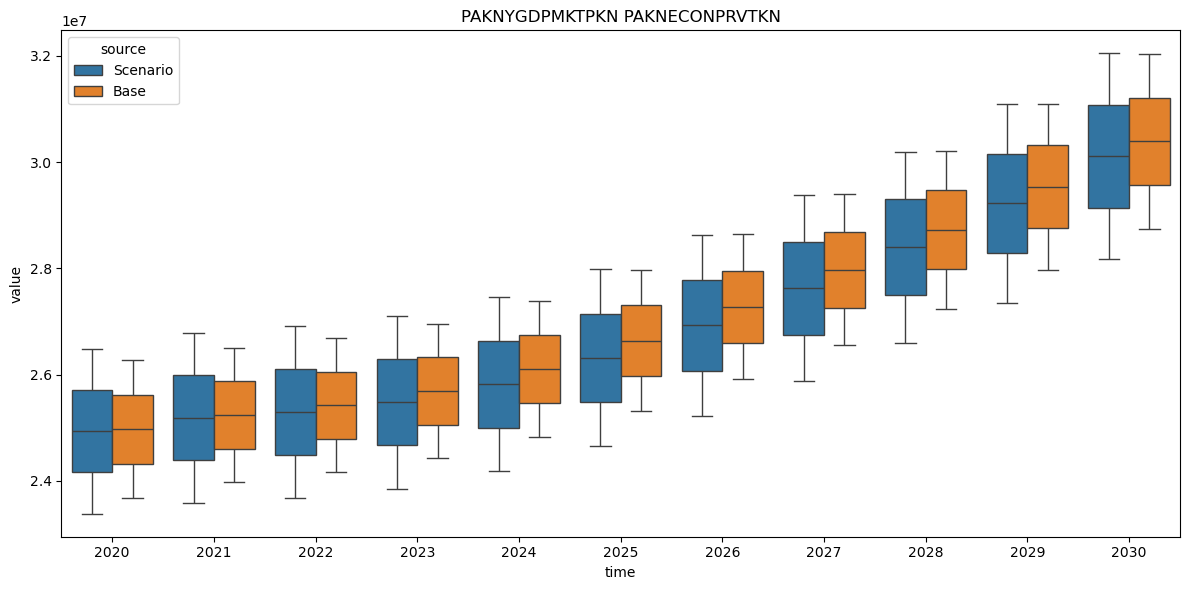

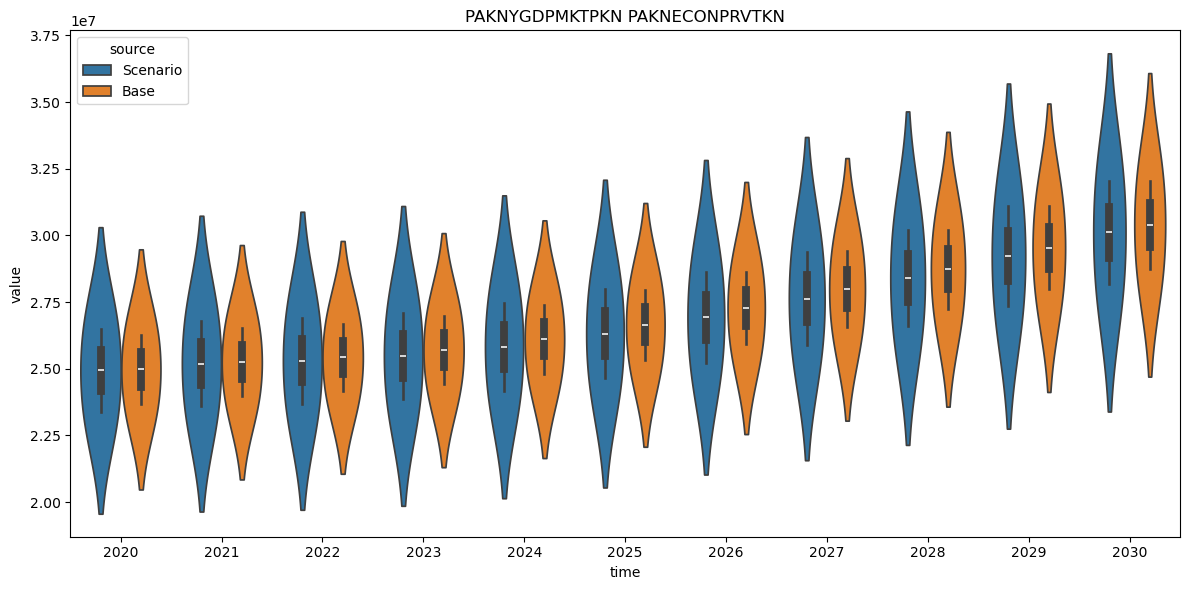

In [53]:
with mpak.set_smpl(2020,2030): 
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.box()  
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.violin()  


### Plot baseline vs alternative
A raw routine, only showing levels.
To make it really useful it should be expanded. 

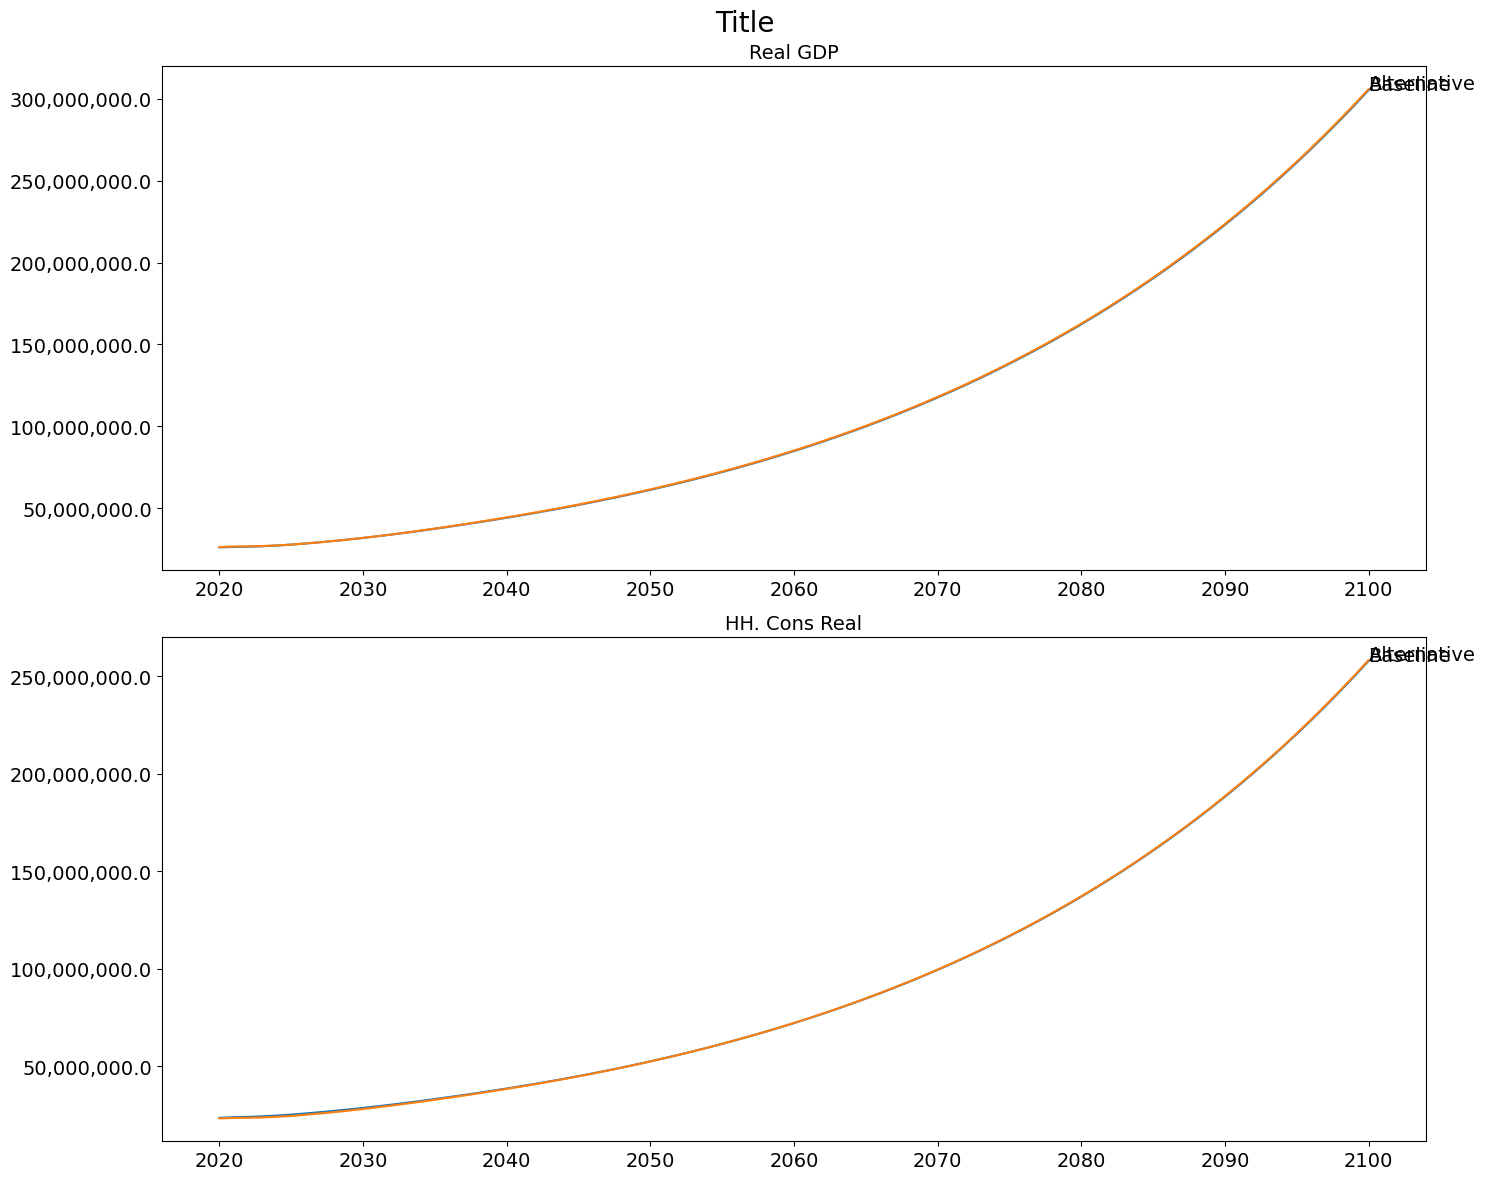

In [54]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].plot_alt() ;


## .draw() Graphical presentation of relationships between variables

.draw() helps you understand the relationship between variables in your model better. 
 
The thickness the arrow reflect the attribution of the upstream variable to the impact on the downstream variable. 

### .draw(up = level, down = level)


You can specify how many levels up and down you want in your graphical presentation (Needs more explanation).

In this example all variables that depend directly upon GDP and consumption as well as those that are determined by them, are displayed. This means one step upstream in the model logic and one step downstream. 

More on the how to visualize the logic structure [here](../06_ModelAnalytics/ModelStructure.ipynb) 

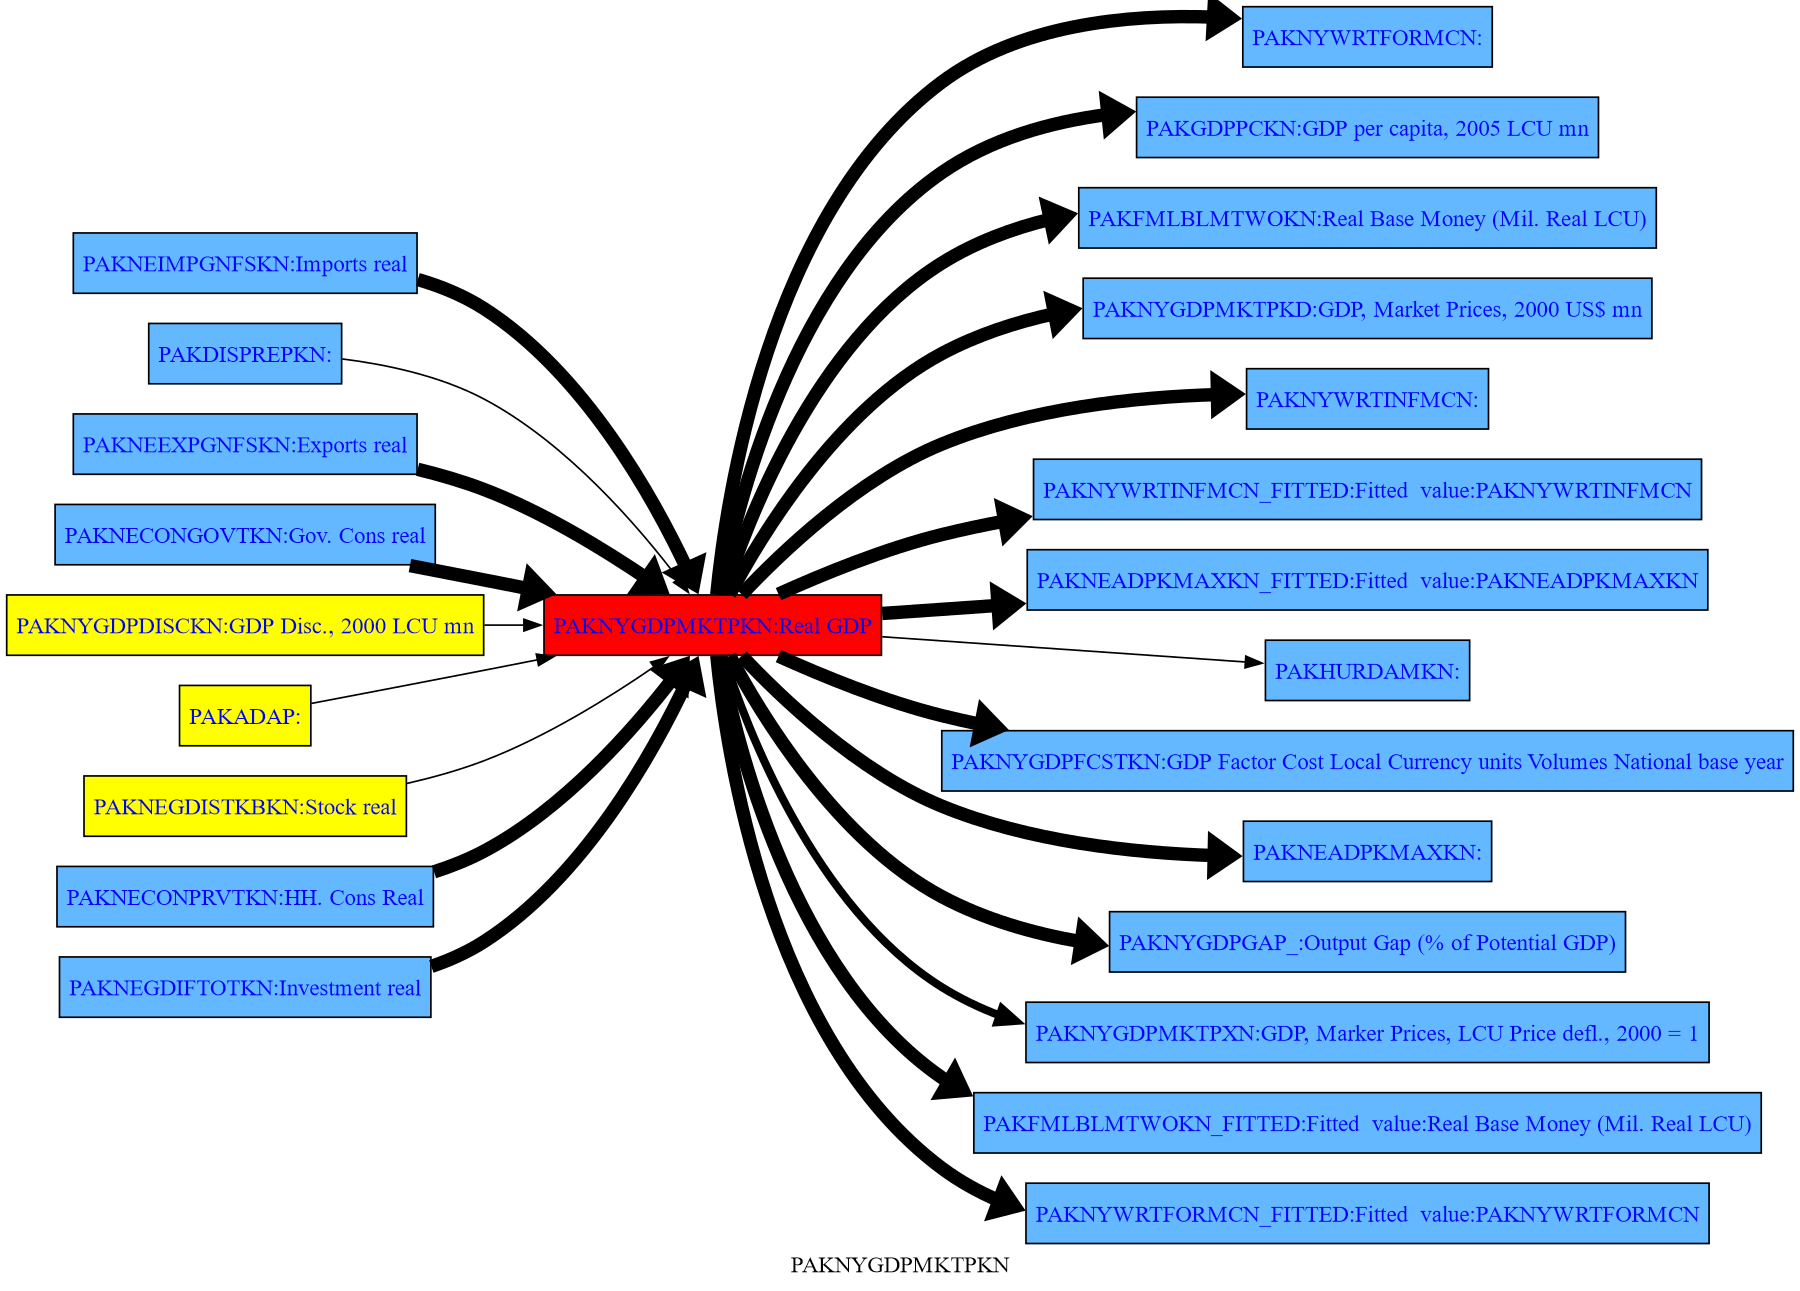

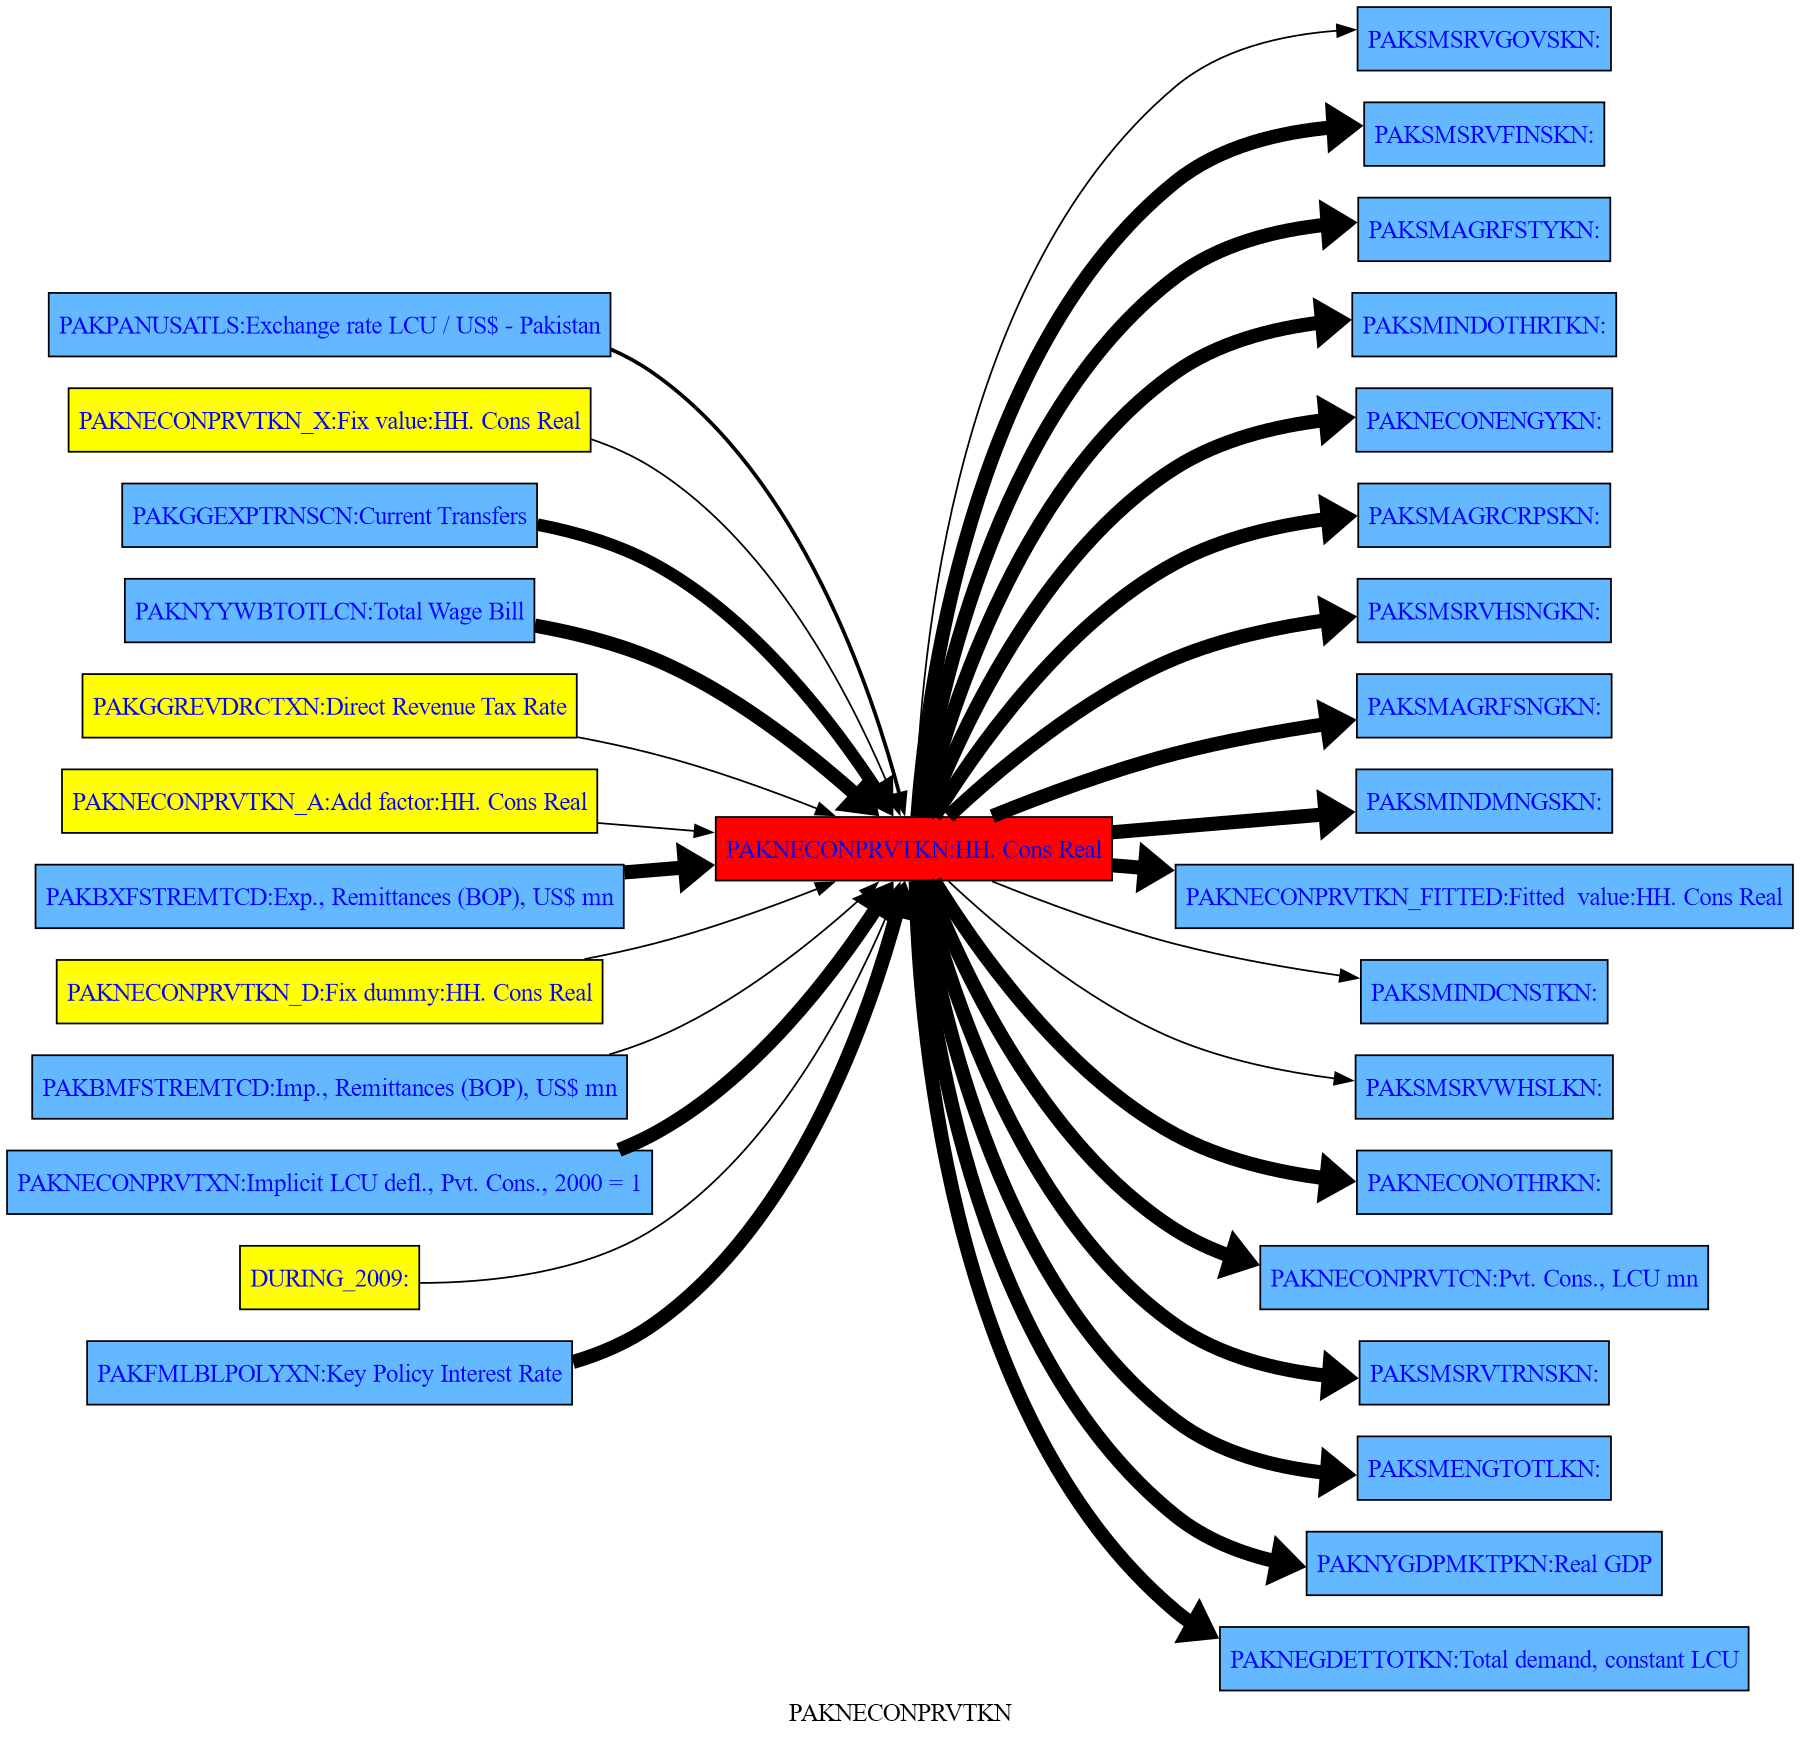

In [55]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].draw(up=1,down=1,png=latex)  # diagram of all direct dependencies 

### .draw(filter =\<minimal impact>)

By specifying filter=  only links where the minimal impact is more than \<minimal impact> are show. In this case 20% 


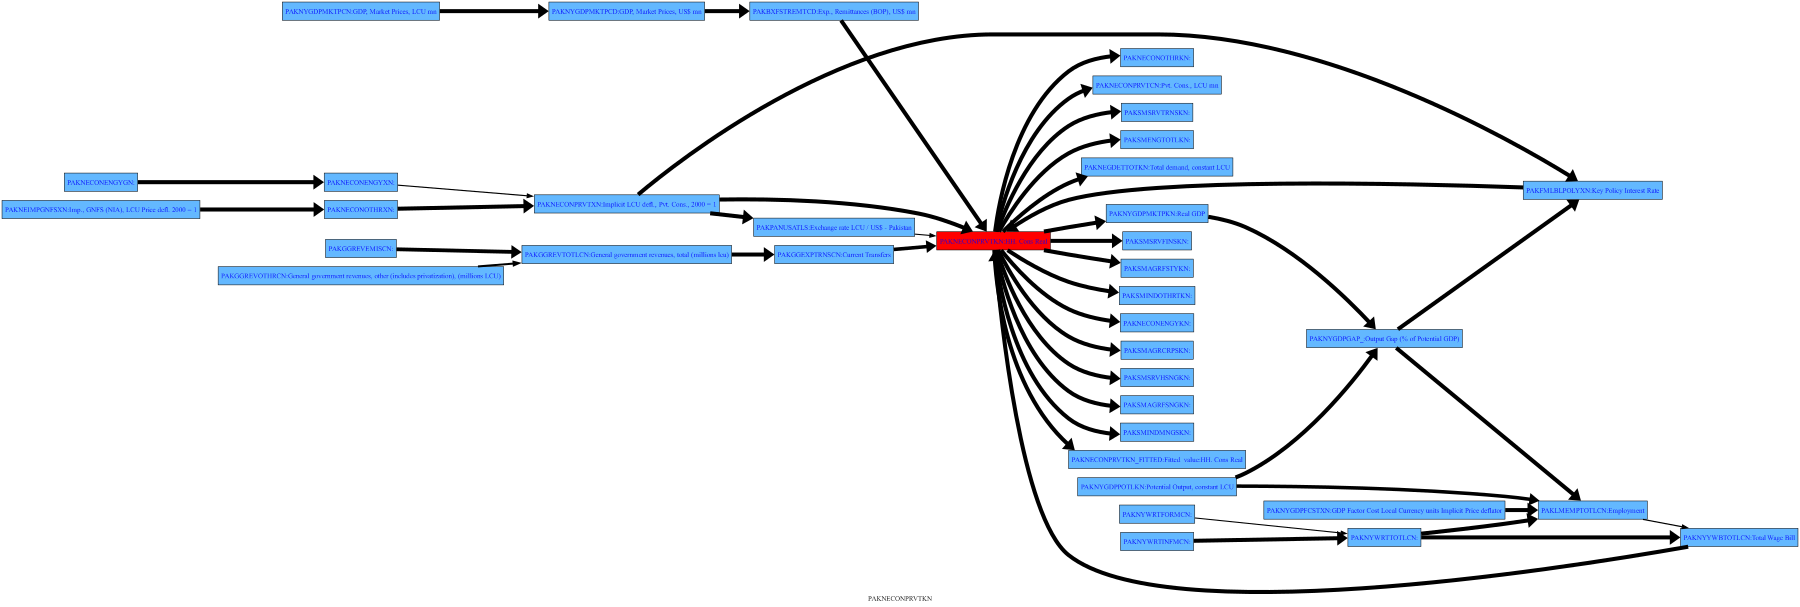

In [56]:
mpak['PAKNECONPRVTKN'].draw(up=3,down=1,filter=20,png=latex)  

## Attribution/decomposition

Attribution is about taking the total derivative of a function. This can be 
done at two levels: 

 - **single equation** To investigate the impact of changes in right hand variables on the left hand variables   
 - **model** To investigate the impact of changes in exogenous variables on selected endogenous variables 


### Single equations attribution
This can either be done where the changes in variables are between: 
 - A baseline and an alternative (usualy `.basedf` and  `.lastdf` (**default**) 
 - From year to year. 



#### `.dekomp()` Attribution of right hand side variables to change in left hand side. 

The `.dekomp()` function is the engine for calculates the contributions of the right hand side variables to the observed change in the left hand side variables. 

The user will usual benefit from using some of the wrappers which can display the results of `.dekomp()`   


| **Parameter** | **Description**                                                                                      |
|---------------|------------------------------------------------------------------------------------------------------|
| `varnavn`     | Input variable name.                                                                                 |
| `start`       | Start period for retrieving variable values (default is '').                                          |
| `end`         | End period for retrieving variable values (default is '').                                            |
| `basedf`      | Base dataframe to use (default is None, meaning '.basedf').                                                             |
| `altdf`       | Alternative dataframe to use (default is None, meaning `.lastdf`).                                                      |
| `lprint`      | Flag to print the results (default is True).                                                          |
| `time_att`    | Flag to do a timewise attribute (default is False).                                                   |


`.dekomp()` returns a named tupple with the results as Dataframes. 

| Field         | Meaning                                              |
|---------------|------------------------------------------------------|
| diff_level    | DataFrame with level differences.                   |
| att_level     | DataFrame with attributions to the level difference. |
| att_pct       | DataFrame with the share of attributions to the difference in level. |
| diff_growth   | DataFrame with differences in growth rate.          |
| att_growth    | DataFrame with attributions to the difference in growth rate. (not accurate)  |



In [57]:
mpak.dekomp.cache_clear()
with mpak.set_smpl(2021,2022):
    dekomp_result = mpak.dekomp('PAKNYGDPMKTPKN',lprint=1)  # frml attribution 


Formula        : FRML <IDENT> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $ 

                       2021        2022
Variable    lag                        
Base        0   26511370.45 26685141.90
Alternative 0   26791399.30 26911678.26
Difference  0     280028.85   226536.36
Percent     0          1.06        0.85

 Contributions to difference for  PAKNYGDPMKTPKN
                         2021       2022
Variable       lag                      
PAKNECONPRVTKN 0   -385108.31 -480338.16
PAKNECONGOVTKN 0    348838.85  308073.15
PAKNEGDIFTOTKN 0    218058.91  217582.81
PAKNEGDISTKBKN 0        -0.02      -0.01
PAKNEEXPGNFSKN 0     -3355.88   -6206.24
PAKNEIMPGNFSKN 0    101595.21  187424.78
PAKNYGDPDISCKN 0        -0.02      -0.01
PAKADAP        0        -0.02      -0.01
PAKDISPREPKN   0        -0.02      -0.01

 Share of contributions to difference for  PAKNYGDPMKTPKN
                      

The content of the returned namedtupple

In [58]:
for name, value in dekomp_result._asdict().items():
    print(f"{name}:\n {value}")


diff_level:
                             2021             2022
Variable    lag                                  
Base        0    26511370.451597  26685141.900638
Alternative 0    26791399.301257  26911678.264054
Difference  0      280028.849661    226536.363416
Percent     0           1.056259         0.848923
att_level:
                              2021           2022
Variable       lag                              
PAKNECONPRVTKN 0   -385108.305552 -480338.157967
PAKNECONGOVTKN 0    348838.846058  308073.148036
PAKNEGDIFTOTKN 0    218058.909007  217582.809019
PAKNEGDISTKBKN 0        -0.017471       -0.00759
PAKNEEXPGNFSKN 0     -3355.878372   -6206.242849
PAKNEIMPGNFSKN 0    101595.208089  187424.776355
PAKNYGDPDISCKN 0        -0.017471       -0.00759
PAKADAP        0        -0.017471       -0.00759
PAKDISPREPKN   0        -0.017471       -0.00759
att_pct:
                           2021        2022
Variable       lag                        
PAKNECONGOVTKN 0    124.572467  135.9928

#### Useful wrappers of single equation attribution 

| **Command**                                      | **Explanation**                                                                 |
|--------------------------------------------------|---------------------------------------------------------------------------------|
|**Variable attribution**||
| `<modelinstance>.<variable name>.dekomp()`       | Perform a decomposition analysis for the variable.                              |
| `<modelinstance>[pattern].dekomp()`             | Perform decomposition analysis on variables matching the given pattern.         |
|||
|**Attribution Extraction**|**Use `threshold=<number>`to limit small attributions**|
| `<modelinstance>.get_att_pct('<variable name>')` | Get the percentage attribution for the variable.                                |
| `<modelinstance>.get_att_level('<variable name>')`| Get the level attribution for the variable.                                     |
|||
|**Plotting attribution**|**Use `threshold=<number>`to limit small attributions**|
| `<modelinstance>.dekomp_plot('<variable name>')`| Plot the decomposition analysis results for the variable.                       |
| `<modelinstance>.dekomp_plot_per('<variable name>')`| Plot decomposition results for a specific period for the variable.             |
| `<modelinstance>.get_dekom_gui('<variable name>')`| Display an interactive GUI for performing decomposition analysis.               |
|||
|**Enhance causal graph with attribution**|**Use `filter=<percent number>` to prune causality graph**|
| `<modelinstance>.<variable name>.draw()`        | Generate a visual representation of the variable's relationships.               |
| `<modelinstance>.<variable name>.tracepre()`    | Trace the predecessors of the variable to understand upstream dependencies.     |
| `<modelinstance>.<variable name>.tracedep()`    | Trace the dependents of the variable to understand downstream effects.          |
| `<modelinstance>.modeldash('<variable name>')`  | Display an interactive dashboard for analyzing the variable.                    |


### Model Attribution

The method `.totdif()` returns an instance of the **`totdif` class**.

It works by solving the model multiple times, each time modifying one of the right-hand side variables and calculating the impact on all dependent variables. By default, it uses the values from the `.lastdf` `DataFrame` as the shock values and the values in `.basedf` as the baseline (initial) values. Separate simulations are run for every exogenous (or exogenized) variable that has changed between the two `DataFrame`s.

For advanced users, the right-hand side (RHS) variables can be grouped into user-defined blocks. This feature is particularly useful when there are many changes, as it helps identify the primary causal pathways.

The result of the attribution analysis is stored in the `.res` property of the `totdif` class instance. This property contains a dictionary with two keys: `'level'` and `'growth'`. These represent the impacts of each exogenous variable or group on the `level` and `growth` metrics, respectively.

The `totdif` class also provides several methods to display the results of the attribution analysis. This eliminates the need to directly access the `.res` property unless custom output is required beyond the standard visualizations.



#### The `.totdif()` Method

In most cases, there is no need to provide parameters to this method. However, if a model is very large, it can be useful to limit the number of variables included in the analysis. This can be controlled using the `summaryvar` parameter.

In certain circumstances, it can also be helpful to group exogenous variables into categories that are analyzed as a whole. For example, in a model with many countries, it might make sense to group shocks by country. Alternatively, it could be useful to group shocks by type across all countries. This grouping can be achieved by setting the `experiments` parameter.


| Parameter    | Type           | Description                                                                                     | Default           |
|--------------|----------------|-------------------------------------------------------------------------------------------------|-------------------|
| `summaryvar` | `str` or `list`| Variables to summarize in the analysis. Use `'*'` to include all variables.                    | `'*'`             |
| `experiments`| `dict`         | A dictionary where keys are experiment names and values are lists of variables to reset to baseline values. If `None`, uses all variables with differences. | `None`            |


In [59]:
totdekomp = mpak.totdif() # Calculate the total derivative½s of all equations in the model.

Total dekomp took       :         3.241 Seconds


In [60]:
totdekomp.res.keys() 

dict_keys(['level', 'growth'])

#### `.totexplain()` to display the results

| Parameter    | Type          | Description                                                                                      | Default          |
|--------------|---------------|--------------------------------------------------------------------------------------------------|------------------|
| `pat`        | `str`         | Pattern to match variables for attribution analysis.                                            | `'*'`            |
| `vtype`      | `str`         | Type of data to attribute. Options: `'all'`, `'per'`, `'last'`, `'sum'`.                        | `'all'`          |
| `stacked`    | `bool`        | Whether to stack the data in the visualization (relevant for bar or area plots).                | `True`           |
| `kind`       | `str`         | Type of plot to generate. Options: `'bar'`, `'line'`, `'area'`, etc.                            | `'bar'`          |
| `per`        | `str` or `int`| Specific period to analyze (used when `vtype` is `'per'`).                                      | `''` (empty)     |
| `title`      | `str`         | Title for the plot. If empty, a default title will be generated based on the analysis type.     | `''` (empty)     |
| `use`        | `str`         | Type of decomposition to use. Options: `'level'`, `'growth'`.                                  | `'level'`        |
| `threshold`  | `float`       | Minimum impact value to include in the visualization (filters out smaller impacts).             | `0.0`            |
| `ysize`      | `int`         | Height of the plot in inches.                                                                   | `10`             |
| `**kwargs`   | `dict`        | Additional keyword arguments passed to underlying visualization methods.                        | N/A              |


The meaning of **vtype** is: 

| `vtype` Value | Description                                                                                     |
|---------------|-------------------------------------------------------------------------------------------------|
| `'all'`       | Performs attribution analysis across all periods and provides a complete decomposition overview. |
| `'per'`       | Analyzes and visualizes the decomposition for a specific period.                                |
| `'last'`      | Focuses on the decomposition of the last period in the data.                                    |
| `'sum'`       | Summarizes and visualizes the cumulative impact across all periods.                             |



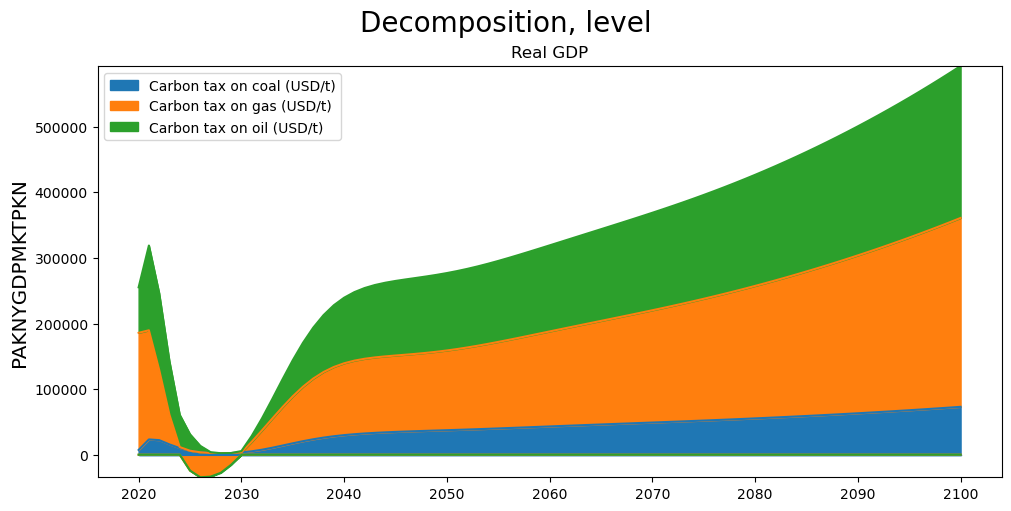

In [61]:
totdekomp.totexplain('PAKNYGDPMKTPKN',kind='area',stacked=True);

## Bespoken plots using matplotlib  (or plotly -later) (should go to a separate plot book 

The predefined plots are not necessary created for presentation purpose. To create  bespoken plots they can be 
constructed directly in python scripts. The two main libraries are matplotlib, plotly but any ther python plotting library can be used. Here is an example using matplotlib. 

## Plot four separate plots of multiple series in grid   

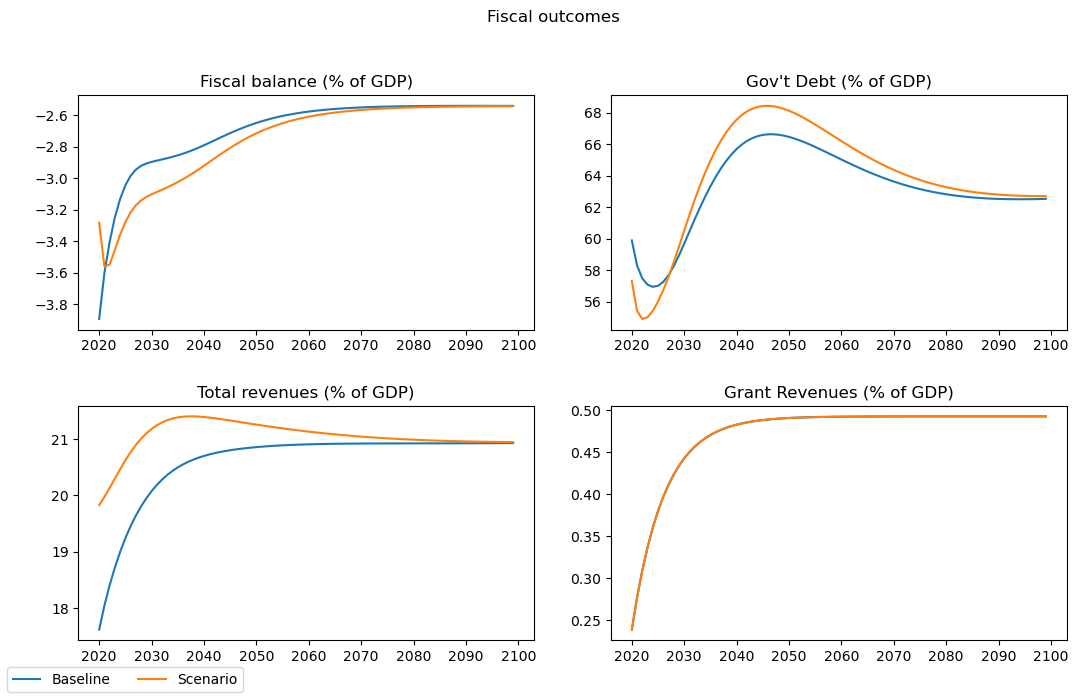

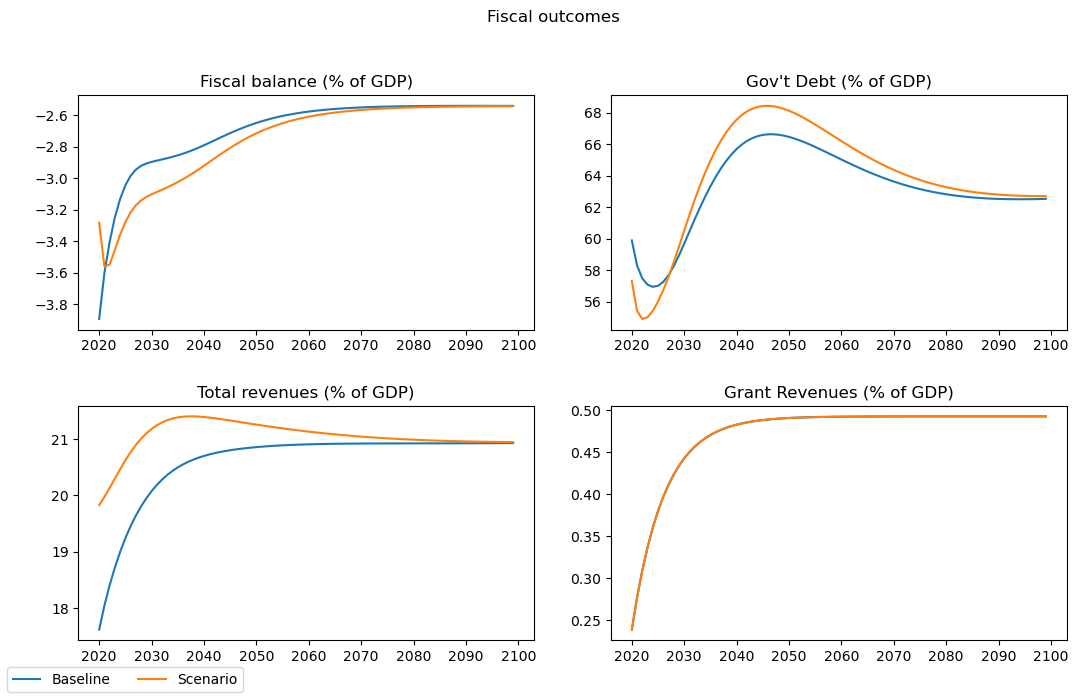

In [62]:
figure,axs= plt.subplots(2,2,figsize=(11, 7))
axs[0,0].plot(mpak.basedf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Baseline')
axs[0,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Scenario')
#axs[0,0].legend()

axs[0,1].plot(mpak.basedf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Baseline')
axs[0,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Scenario')

axs[1,0].plot(mpak.basedf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[1,1].plot(mpak.basedf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')
#axs2[4].plot(mpak.lastdf.loc[2000:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2000:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[0,0].title.set_text("Fiscal balance (% of GDP)")
axs[0,1].title.set_text("Gov't Debt (% of GDP)")
axs[1,0].title.set_text("Total revenues (% of GDP)")
axs[1,1].title.set_text("Grant Revenues (% of GDP)")
figure.suptitle("Fiscal outcomes")

plt.figlegend(['Baseline','Scenario'],loc='lower left',ncol=5)  
figure.tight_layout(pad=2.3) #Ensures legend does not overlap dates
figure